# Разработка решения, позволяющее оптимизировать управление персоналом, для  HR-аналитики компании «Работа с заботой».


## Описание проекта
HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.  
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли.   
У нас будет несколько задач:
Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.
Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.    
Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.


## Описание данных

***Задача 1: Предсказание уровня удовлетворённости сотрудника.  
Для этой задачи заказчик предоставил данные с признаками:***
- `id` — уникальный идентификатор сотрудника
- `dept` — отдел, в котором работает сотрудник
- `level` — уровень занимаемой должности
- `workload` — уровень загруженности сотрудника
- `employment_years` — длительность работы в компании (в годах)
- `last_year_promo` — показывает, было ли повышение за последний год
- `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год
- `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель
- `salary` — ежемесячная зарплата сотрудника
- `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак

***Предоставлены данные в нескольких таблицах:***  
Тренировочная выборка:  
`train_job_satisfaction_rate.csv`  
Входные признаки тестовой выборки:  
`test_features.csv`  
Целевой признак тестовой выборки:  
`test_target_job_satisfaction_rate.csv`  


## План работы

- Шаг 1. Загрузка данных    
- Шаг 2. Предобработка данных  
- Шаг 3. Исследовательский анализ данных  
- Шаг 4. Подготовка данных
- Шаг 5. Обучение моделей  
- Шаг 6. Оформление выводов

***Задача 2: Предсказание увольнения сотрудника из компании.  
Для этой задачи мы можем использовать те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: это `quit` — увольнение сотрудника из компании.***  

***Предоставлены данные в нескольких таблицах:***  
Тренировочная выборка:  
`train_job_satisfaction_rate.csv`  
Входные признаки тестовой выборки:  
`test_features.csv`  
Целевой признак тестовой выборки:  
`test_target_job_satisfaction_rate.csv`  

## План работы

- Шаг 1. Загрузка данных    
- Шаг 2. Предобработка данных  
- Шаг 3. Исследовательский анализ данных  
- Шаг 4. Добавление нового входного признака
- Шаг 5. Подготовка данных  
- Шаг 6. Обучение модели
- Шаг 7. Выводы

## Общий вывод

## Задача 1

## Шаг 1. Загрузка данных

In [2]:
#!pip install -U scikit-learn -q

In [3]:
#!pip install phik -q 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik

from phik.report import plot_correlation_matrix
from phik import report

from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics, model_selection, svm
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import (
    GridSearchCV, RandomizedSearchCV, train_test_split
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler, LabelEncoder
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import scipy.stats as stats

In [5]:
# Константы
RANDOM_STATE = 100
TEST_SIZE = 0.25

In [6]:
train_job_satisfaction_rate = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
train_job_satisfaction_rate.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


In [7]:
test_features = pd.read_csv('/datasets/test_features.csv')
test_features.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


In [8]:
test_target_job_satisfaction_rate = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
test_target_job_satisfaction_rate.head(10)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
5,817219,0.76
6,269033,0.64
7,962356,0.38
8,649052,0.14
9,532834,0.59


***Провели анализ полученных данных. Значимых замечаний не выявлено.***

## Шаг 2. Предобработка данных

In [9]:
train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [10]:
train_job_satisfaction_rate.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [11]:
train_job_satisfaction_rate.duplicated().sum()

0

***Выведем количество дубликатов в столбце `id`***

In [12]:
duplicate_id = train_job_satisfaction_rate[train_job_satisfaction_rate.duplicated(['id'])]

print(duplicate_id)

Empty DataFrame
Columns: [id, dept, level, workload, employment_years, last_year_promo, last_year_violations, supervisor_evaluation, salary, job_satisfaction_rate]
Index: []


In [13]:
for col in train_job_satisfaction_rate.iloc[:, 1:8]:
    print(train_job_satisfaction_rate[col].unique ())

['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
['junior' 'middle' 'sinior' nan]
['medium' 'high' 'low']
[ 2  1  4  7  9  6  3 10  8  5]
['no' 'yes']
['no' 'yes']
[1 5 2 3 4]


In [14]:
for col in train_job_satisfaction_rate.iloc[:, 1:8]:
    train_job_satisfaction_rate[col] = train_job_satisfaction_rate[col].replace('sinior', 'senior')
    print(train_job_satisfaction_rate[col].unique())

['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
['junior' 'middle' 'senior' nan]
['medium' 'high' 'low']
[ 2  1  4  7  9  6  3 10  8  5]
['no' 'yes']
['no' 'yes']
[1 5 2 3 4]


In [15]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [16]:
test_features.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [17]:
test_features.duplicated().sum()

0

***Выведем количество дубликатов в столбце `id`***

In [18]:
duplicate_id = test_features[test_features.duplicated(['id'])]
print(duplicate_id)

Empty DataFrame
Columns: [id, dept, level, workload, employment_years, last_year_promo, last_year_violations, supervisor_evaluation, salary]
Index: []


In [19]:
for col in test_features.iloc[:, 1:8]:
    test_features[col] = test_features[col].replace('sinior', 'senior')
    print(test_features[col].unique())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
['junior' 'middle' 'senior' nan]
['medium' 'low' 'high' ' ']
[ 2  1  5  6  3  9  7  4  8 10]
['no' 'yes']
['no' 'yes']
[5 4 3 1 2]


In [20]:
test_features['dept'] = test_features['dept'].replace(' ', np.nan)
test_features['workload'] = test_features['workload'].replace(' ', np.nan)
for col in test_features.iloc[:, 1:8]:
    print(test_features[col].unique ())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
['junior' 'middle' 'senior' nan]
['medium' 'low' 'high' nan]
[ 2  1  5  6  3  9  7  4  8 10]
['no' 'yes']
['no' 'yes']
[5 4 3 1 2]


In [21]:
test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [22]:
test_target_job_satisfaction_rate.isna().sum()

id                       0
job_satisfaction_rate    0
dtype: int64

In [23]:
test_target_job_satisfaction_rate.duplicated().sum()

0

***Выведем количество дубликатов в столбце `id`***

In [24]:
duplicate_id = test_target_job_satisfaction_rate[test_target_job_satisfaction_rate.duplicated(['id'])]
print(duplicate_id)

Empty DataFrame
Columns: [id, job_satisfaction_rate]
Index: []


***Провели предобработку полученных данных. Дубликаты не обнаружены. Выявлены пропуски и пробелы в данных. Проведем замену пробелов `' '` на `np.nan` пропуск. Проведем в дальнейшем заполнение пропусков в пайплайне при обучении модели с использованием `SimpleImputer` в категориальных признаках на самое распростроненное значение.***

## Шаг 3. Исследовательский анализ данных

In [25]:
def descr (df):
    display(df.head(5))
    display(df.info()) 
    print(f'Количество дубликатов: {df.duplicated().sum()}')
    print(f'Количество пропусков: {df.isna().sum()}')

In [26]:
def diagram(file, column, title, xlabel, ylabel):
    # Подсчет общего числа строк в DataFrame
    total = len(file)
    
    # Группировка данных по заданной колонке и вычисление доли для каждой группы
    proportions = file[column].value_counts(normalize=True).sort_values(ascending=False)
    
    # Построение горизонтальной столбчатой диаграммы с объемным эффектом
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Добавление теней для создания объемного эффекта
    bars = ax.barh(proportions.index, proportions.values, color=(0.5, 0, 0.5, 0.6), edgecolor='black')
    
    for bar in bars:
        bar.set_zorder(2)  # Установить порядок отображения бара
        # Создание тени
        shadow = ax.barh(bar.get_y() + bar.get_height()/2, bar.get_width(), height=bar.get_height()*0.8, 
                         left=0, color='gray', alpha=0.2, zorder=1)

    # Настройка заголовка и подписей к осям
    ax.set_title(title, fontsize=16, fontweight="bold", color='black')
    ax.set_xlabel(xlabel, fontsize=16, fontweight="bold", color='black')
    ax.set_ylabel(ylabel, fontsize=16, fontweight="bold", color='black')
    
    # Добавление процентных значений на график
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height() / 2, 
                f'{width * 100:.2f}%', 
                va='center', ha='left', fontsize='large', fontweight='bold', color='black')
    
    # Инвертирование оси Y для отображения больших значений сверху
    ax.invert_yaxis()

In [27]:
def bar_chart_target(file, target, column, title, xlabel, ylabel, A, B):
    # Настройка фигуры
    fig, ax = plt.subplots(figsize=(16, 8))

    # Цвета для гистограмм
    color_A = (0.8, 0.2, 0.2, 0.7)  # Полупрозрачный красный
    color_B = (0.2, 0.2, 0.8, 0.7)  # Полупрозрачный синий

    # Построение гистограмм с небольшим смещением
    bins = 50
    data_A = file[column][file[target] == A]
    data_B = file[column][file[target] == B]

    ax.hist(data_A, bins=bins, color=color_A, alpha=0.5, label=f'{A}', edgecolor='black')
    ax.hist(data_B, bins=bins, color=color_B, alpha=0.5, label=f'{B}', edgecolor='black', histtype='stepfilled', linewidth=1.5)

    # Настройка заголовка и подписей к осям
    ax.set_title(title, fontsize=16, fontweight="bold", color='black')
    ax.set_xlabel(xlabel, fontsize=16, fontweight="bold", color='black')
    ax.set_ylabel(ylabel, fontsize=16, fontweight="bold", color='black')

    # Настройка легенды
    ax.legend(fontsize=14)

    # Настройка отображения для предотвращения наложения элементов
    plt.tight_layout(pad=2.0)

In [28]:
def bar_chart(file, column, title, xlabel, ylabel, bins):
    # Настройка фигуры
    fig, ax = plt.subplots(figsize=(16, 8))

    # Цвет для гистограммы
    color = (0.2, 0.6, 0.8, 0.7)

    # Построение гистограммы
    file[column].plot(kind='hist', bins=bins, grid=False, color=color, ax=ax, alpha=0.7)

    # Настройка заголовка и подписей к осям
    ax.set_title(title, fontsize=16, fontweight="bold", color='black')
    ax.set_xlabel(xlabel, fontsize=16, fontweight="bold", color='black')
    ax.set_ylabel(ylabel, fontsize=16, fontweight="bold", color='black')

    # Настройка отображения для предотвращения наложения элементов
    plt.tight_layout(pad=2.0)

In [29]:
#пропишем автоматизацию построения графика для дискретных признаков
def bar_chart_2(file, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=file, x=column)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

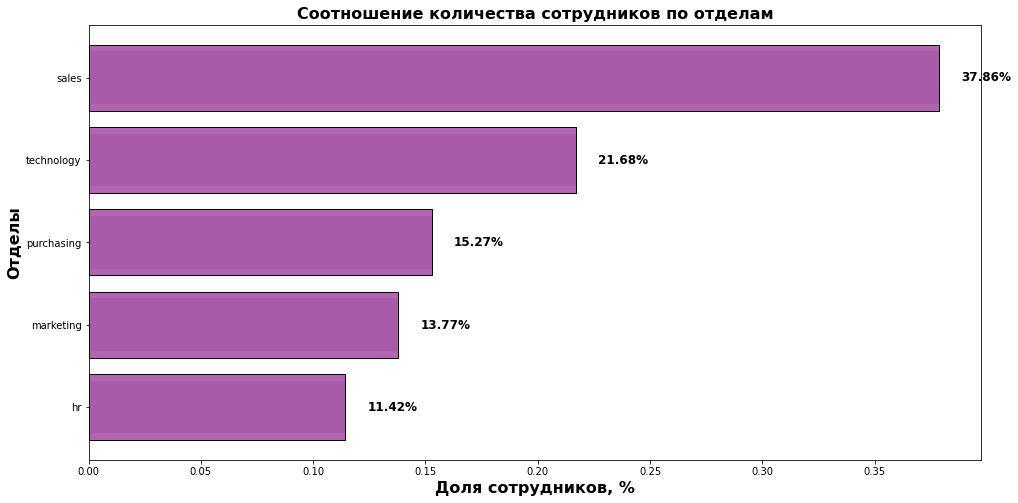

In [30]:
file=train_job_satisfaction_rate
column='dept'
title='Соотношение количества сотрудников по отделам'
xlabel='Доля сотрудников, %'
ylabel='Отделы'
diagram(file, column, title, xlabel, ylabel)

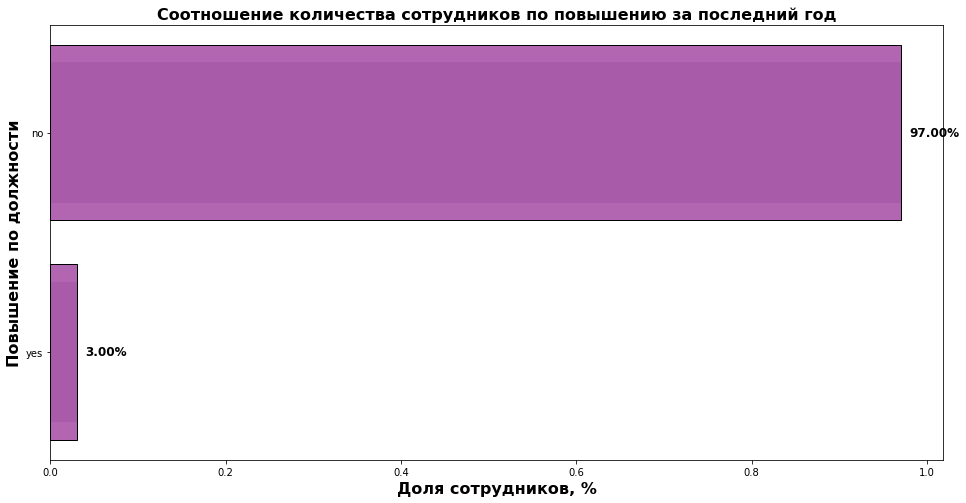

In [31]:
file=train_job_satisfaction_rate
column='last_year_promo'
title='Соотношение количества сотрудников по повышению за последний год'
xlabel='Доля сотрудников, %'
ylabel='Повышение по должности'
diagram(file, column, title, xlabel, ylabel)

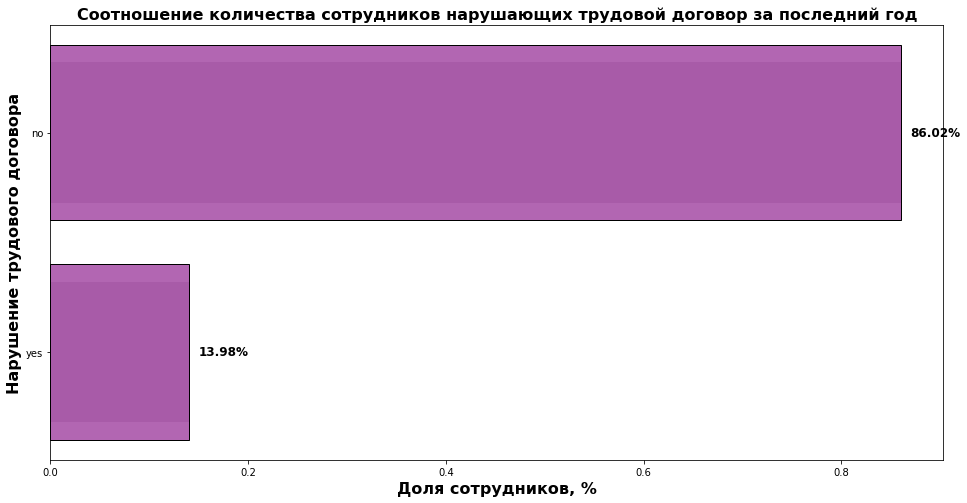

In [32]:
file=train_job_satisfaction_rate
column='last_year_violations'
title='Соотношение количества сотрудников нарушающих трудовой договор за последний год'
xlabel='Доля сотрудников, %'
ylabel='Нарушение трудового договора'
diagram(file, column, title, xlabel, ylabel)

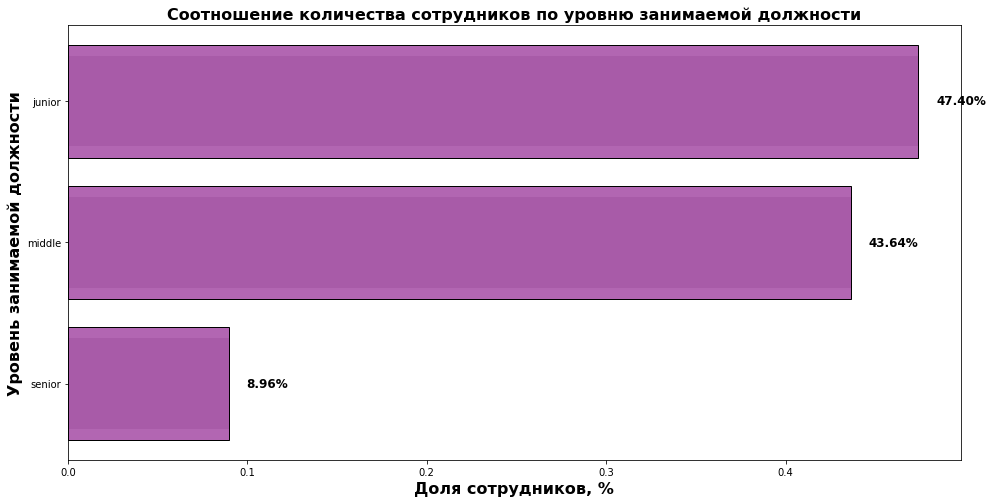

In [33]:
file=train_job_satisfaction_rate
column='level'
title='Соотношение количества сотрудников по уровню занимаемой должности'
xlabel='Доля сотрудников, %'
ylabel='Уровень занимаемой должности'
diagram(file, column, title, xlabel, ylabel)

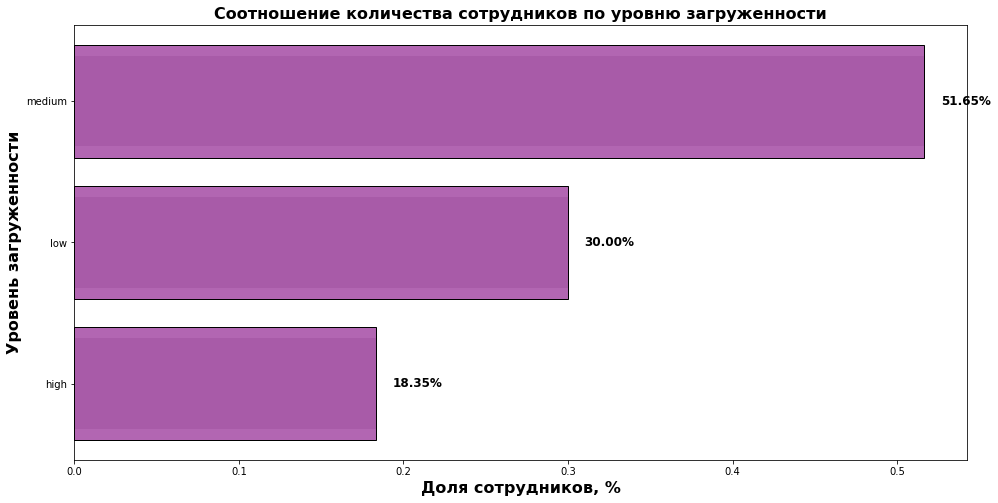

In [34]:
file=train_job_satisfaction_rate
column='workload'
title='Соотношение количества сотрудников по уровню загруженности'
xlabel='Доля сотрудников, %'
ylabel='Уровень загруженности'
diagram(file, column, title, xlabel, ylabel)

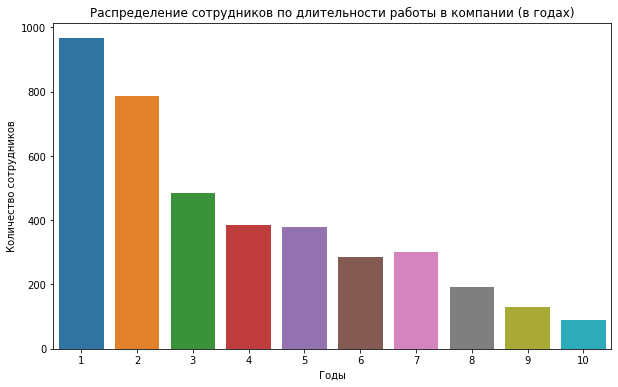

In [36]:
file = train_job_satisfaction_rate
column = 'employment_years'
title = 'Распределение сотрудников по длительности работы в компании (в годах)'
xlabel = 'Годы'
ylabel = 'Количество сотрудников'

bar_chart_2(file, column, title, xlabel, ylabel)

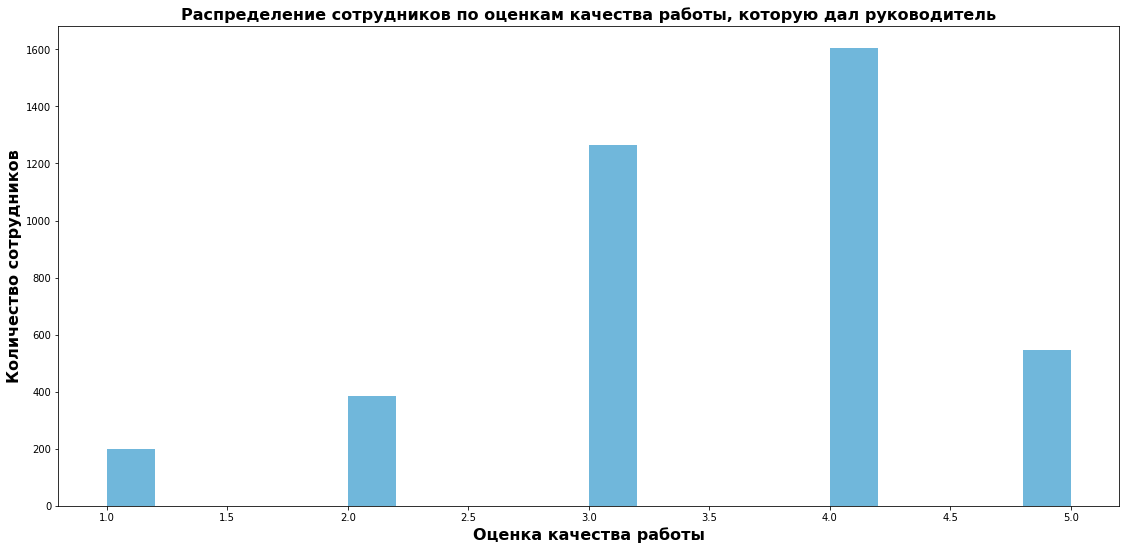

In [37]:
file=train_job_satisfaction_rate
column='supervisor_evaluation'
title='Распределение сотрудников по оценкам качества работы, которую дал руководитель'
xlabel='Оценка качества работы'
ylabel='Количество сотрудников'
bins=20
bar_chart(file, column, title, xlabel, ylabel, bins)

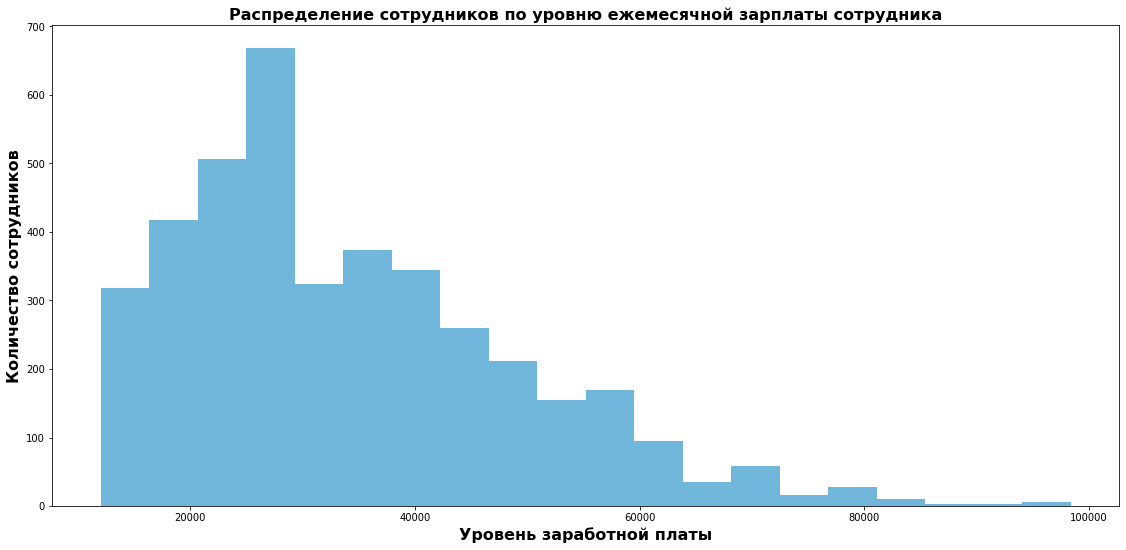

In [38]:
file=train_job_satisfaction_rate
column='salary'
title='Распределение сотрудников по уровню ежемесячной зарплаты сотрудника'
xlabel='Уровень заработной платы'
ylabel='Количество сотрудников'
bins=20
bar_chart(file, column, title, xlabel, ylabel, bins)

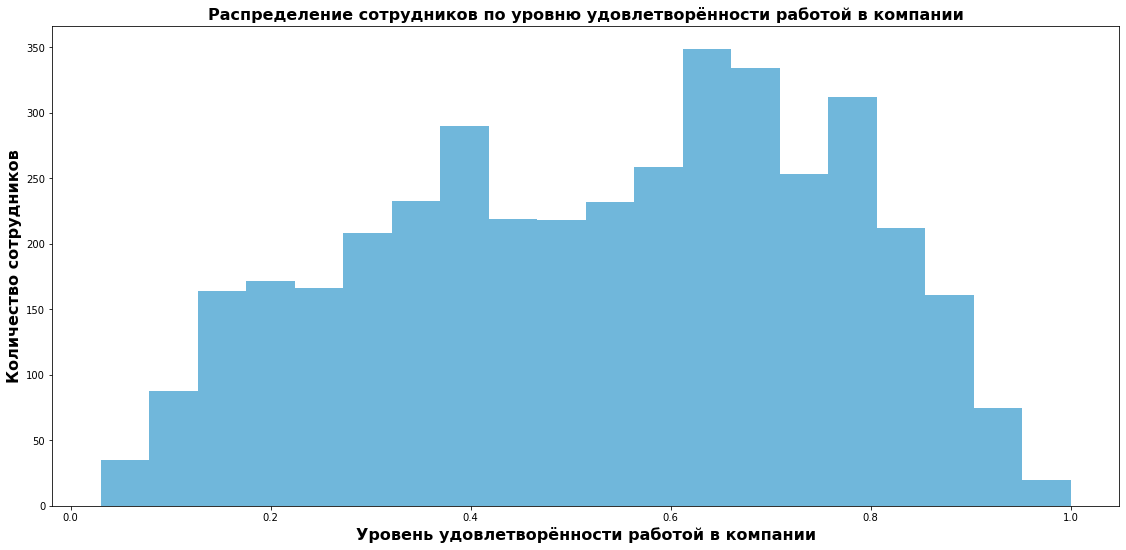

In [39]:
file=train_job_satisfaction_rate
column='job_satisfaction_rate'
title='Распределение сотрудников по уровню удовлетворённости работой в компании'
xlabel='Уровень удовлетворённости работой в компании'
ylabel='Количество сотрудников'
bins=20
bar_chart(file, column, title, xlabel, ylabel, bins)

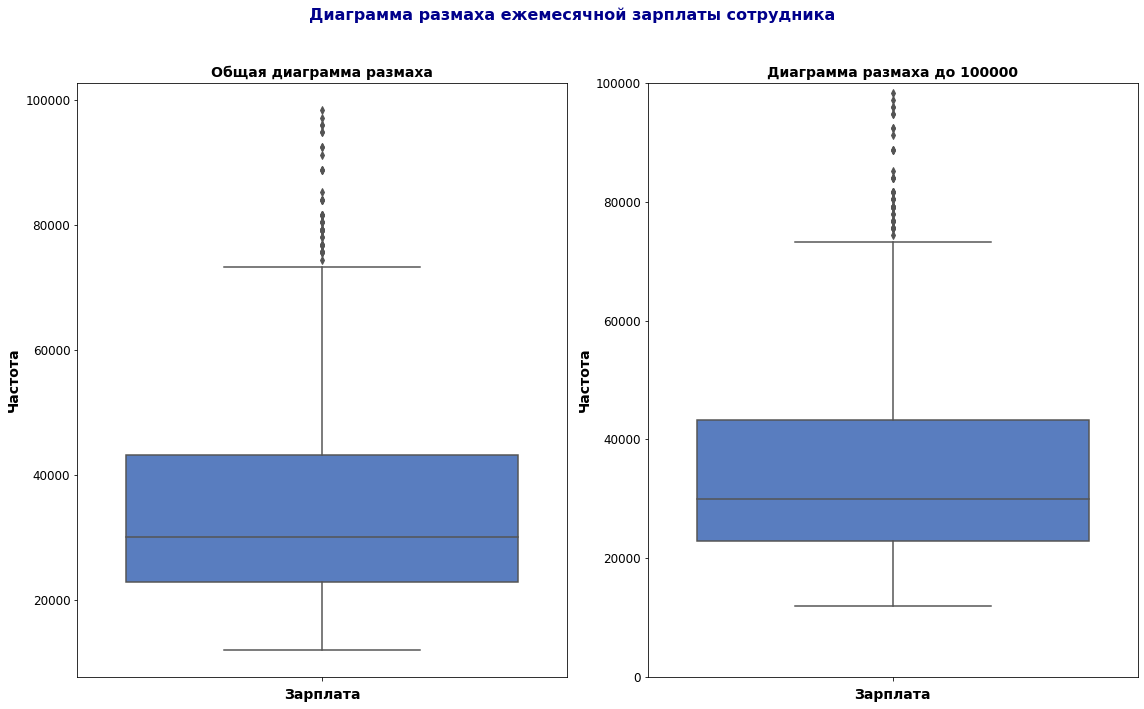

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# Цветовая схема и стиль
palette = sns.color_palette("muted")

# Построение первого графика
sns.boxplot(y='salary', data=train_job_satisfaction_rate, ax=axes[0], palette=palette)
axes[0].set_title('Общая диаграмма размаха', fontsize=14, fontweight='bold')

# Построение второго графика с ограничением по оси Y
sns.boxplot(y='salary', data=train_job_satisfaction_rate, ax=axes[1], palette=palette)
axes[1].set_ylim(0, 100000)
axes[1].set_title('Диаграмма размаха до 100000', fontsize=14, fontweight='bold')

# Общий заголовок
plt.suptitle('Диаграмма размаха ежемесячной зарплаты сотрудника', fontsize=16, fontweight="bold", color='darkblue')

# Настройка осей
for ax in axes:
    ax.set_xlabel('Зарплата', fontsize=14, fontweight='bold', color='black')
    ax.set_ylabel('Частота', fontsize=14, fontweight='bold', color='black')
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

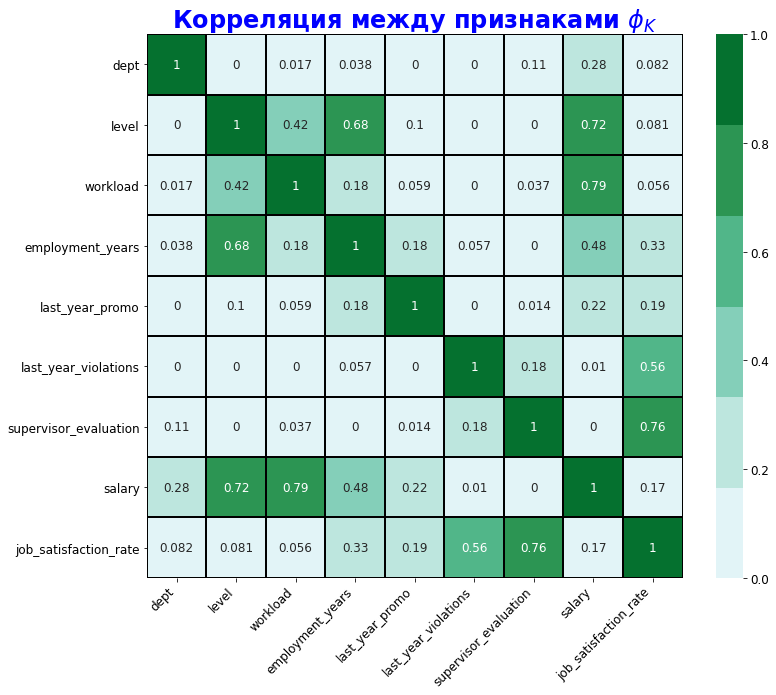

In [41]:
file = train_job_satisfaction_rate[train_job_satisfaction_rate.columns[train_job_satisfaction_rate.columns != 'id']]

all_features = list(file.columns)

correlation = file[all_features].phik_matrix(interval_cols = [ 'salary', 'job_satisfaction_rate'])

plt.figure(figsize=(12,10))
colormap = sns.color_palette('BuGn')
plt.rc('font', size= 12)
chart = sns.heatmap(correlation, annot=True, cmap=colormap, linewidths=1, linecolor='black')
plt.title(r'Корреляция между признаками $\phi_K$', fontsize=24, fontweight="bold", color='blue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_yticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

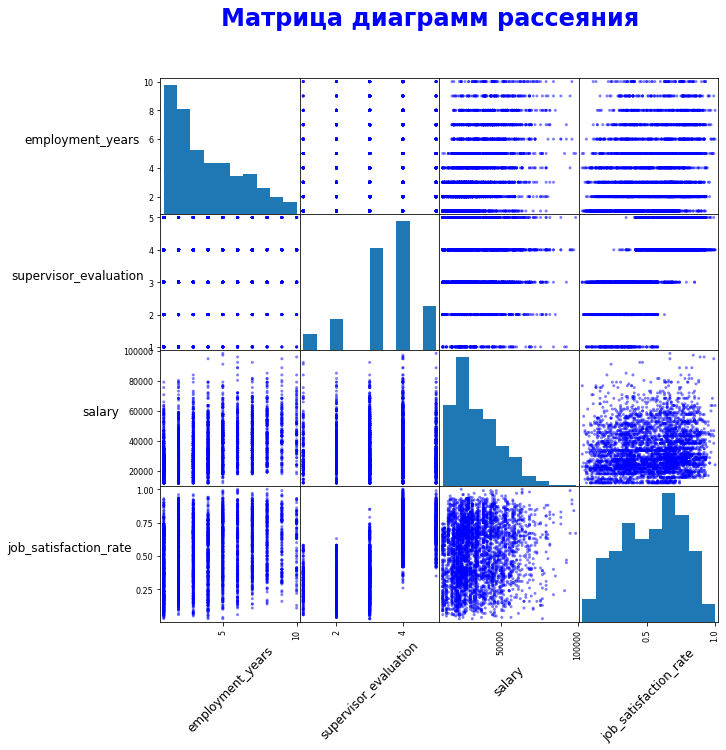

In [42]:
file = train_job_satisfaction_rate

axes = pd.plotting.scatter_matrix(file[file.columns[file.columns != 'id']], figsize=(10, 10), color='blue')

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.suptitle('Матрица диаграмм рассеяния', fontsize=24, fontweight="bold", color='blue')
plt.show()

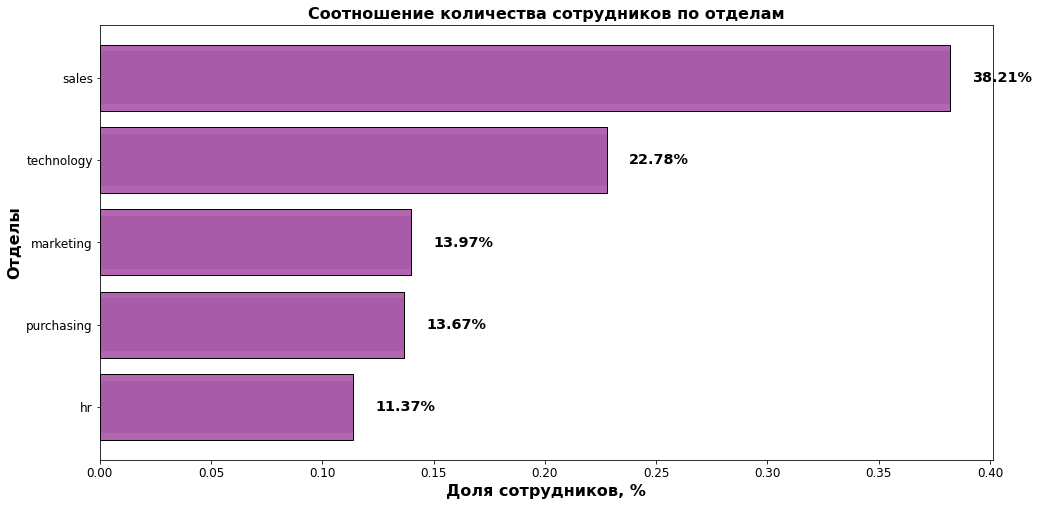

In [43]:
file=test_features
column='dept'
title='Соотношение количества сотрудников по отделам'
xlabel='Доля сотрудников, %'
ylabel='Отделы'
diagram(file, column, title, xlabel, ylabel)

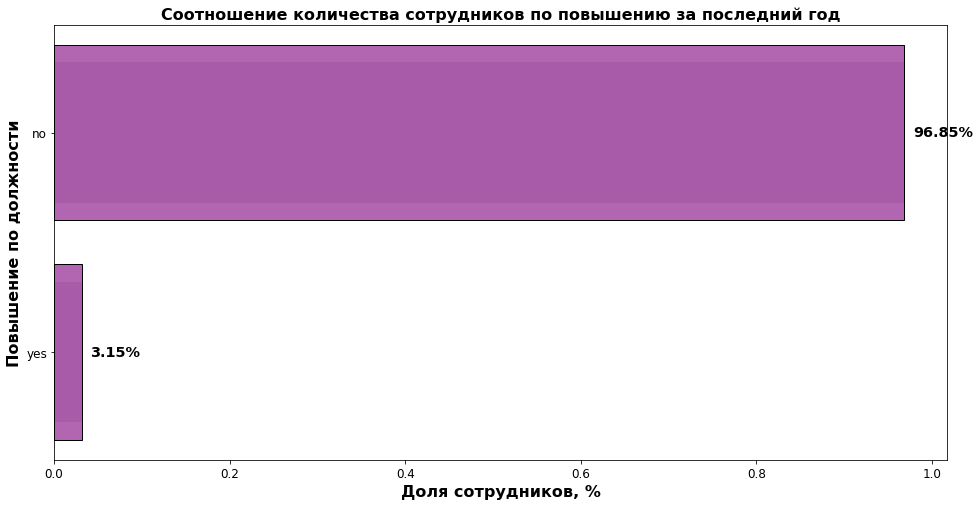

In [44]:
file=test_features
column='last_year_promo'
title='Соотношение количества сотрудников по повышению за последний год'
xlabel='Доля сотрудников, %'
ylabel='Повышение по должности'
diagram(file, column, title, xlabel, ylabel)

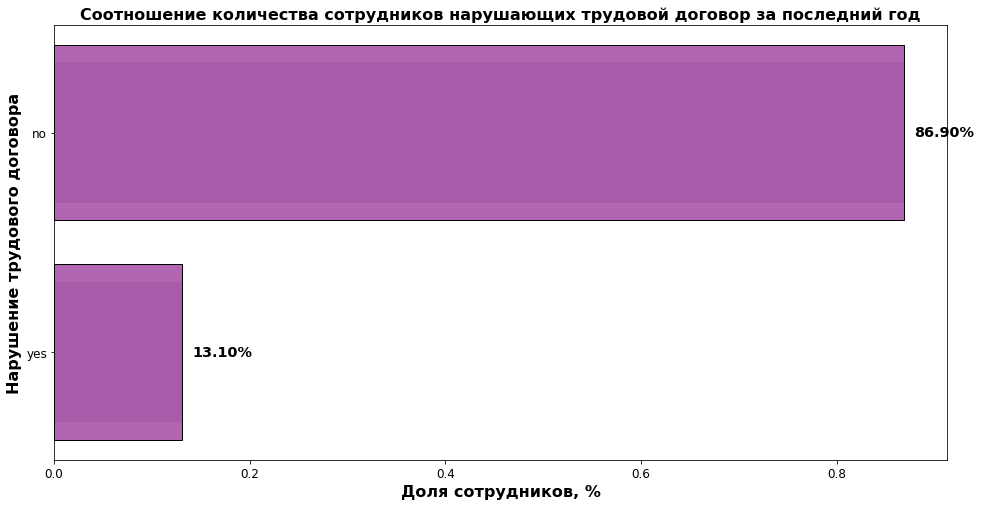

In [45]:
file=test_features
column='last_year_violations'
title='Соотношение количества сотрудников нарушающих трудовой договор за последний год'
xlabel='Доля сотрудников, %'
ylabel='Нарушение трудового договора'
diagram(file, column, title, xlabel, ylabel)

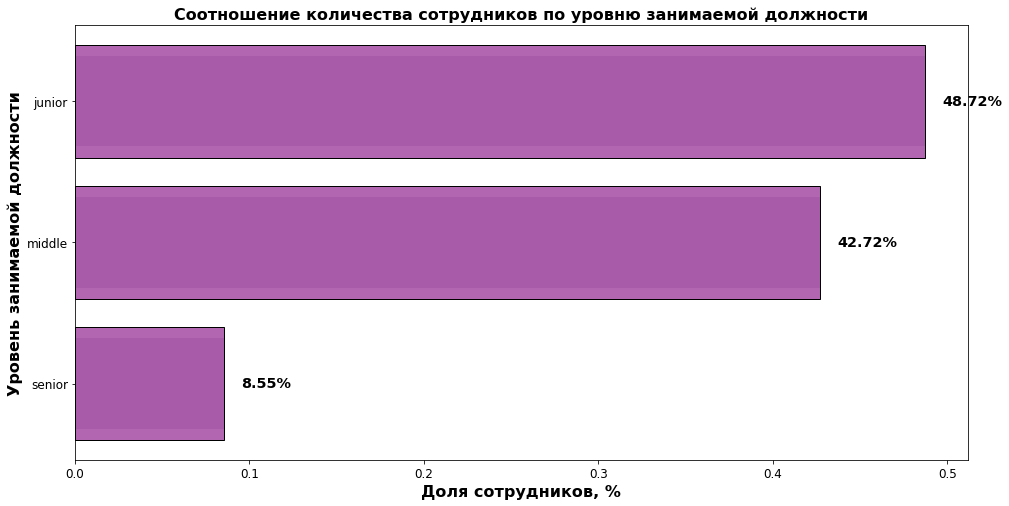

In [46]:
file=test_features
column='level'
title='Соотношение количества сотрудников по уровню занимаемой должности'
xlabel='Доля сотрудников, %'
ylabel='Уровень занимаемой должности'
diagram(file, column, title, xlabel, ylabel)

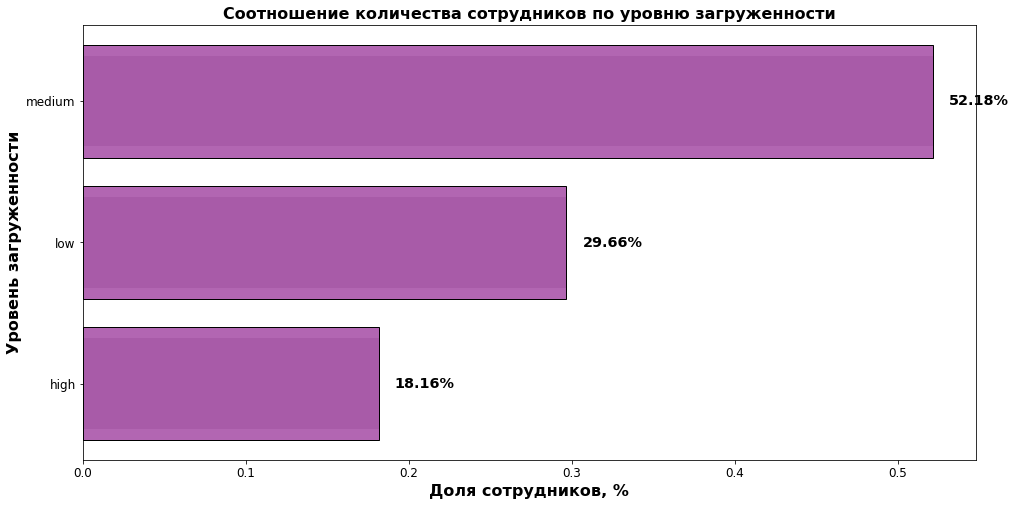

In [47]:
file=test_features
column='workload'
title='Соотношение количества сотрудников по уровню загруженности'
xlabel='Доля сотрудников, %'
ylabel='Уровень загруженности'
diagram(file, column, title, xlabel, ylabel)

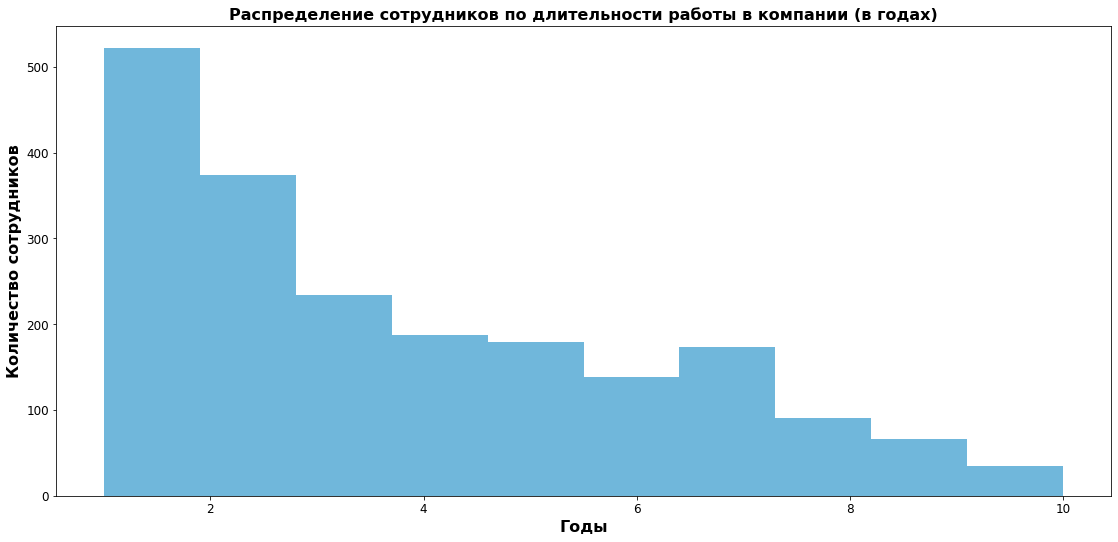

In [48]:
file=test_features
column='employment_years'
title='Распределение сотрудников по длительности работы в компании (в годах)'
xlabel='Годы'
ylabel='Количество сотрудников'
bins=10
bar_chart(file, column, title, xlabel, ylabel, bins)

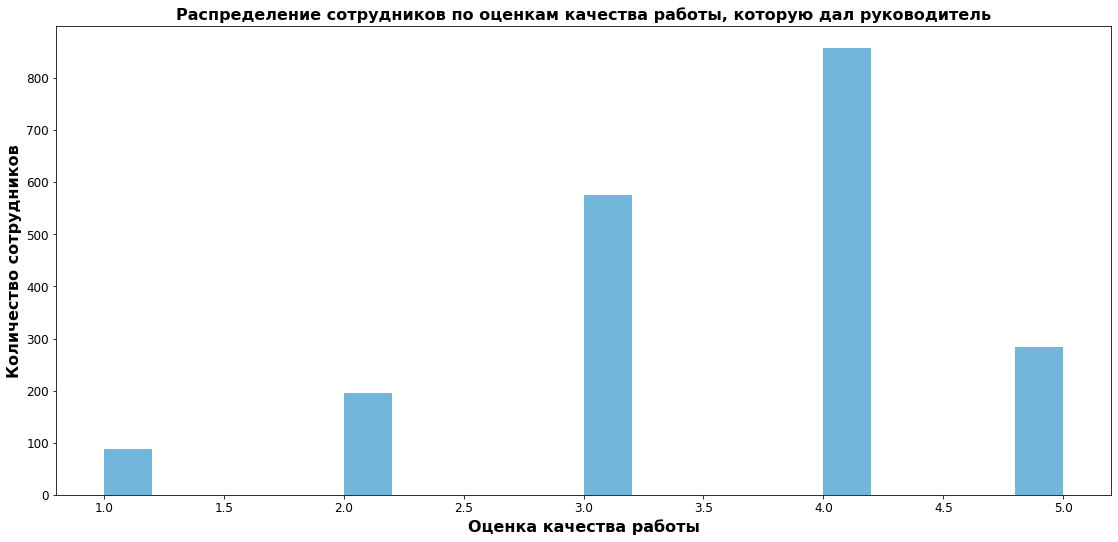

In [49]:
file=test_features
column='supervisor_evaluation'
title='Распределение сотрудников по оценкам качества работы, которую дал руководитель'
xlabel='Оценка качества работы'
ylabel='Количество сотрудников'
bins=20
bar_chart(file, column, title, xlabel, ylabel, bins)

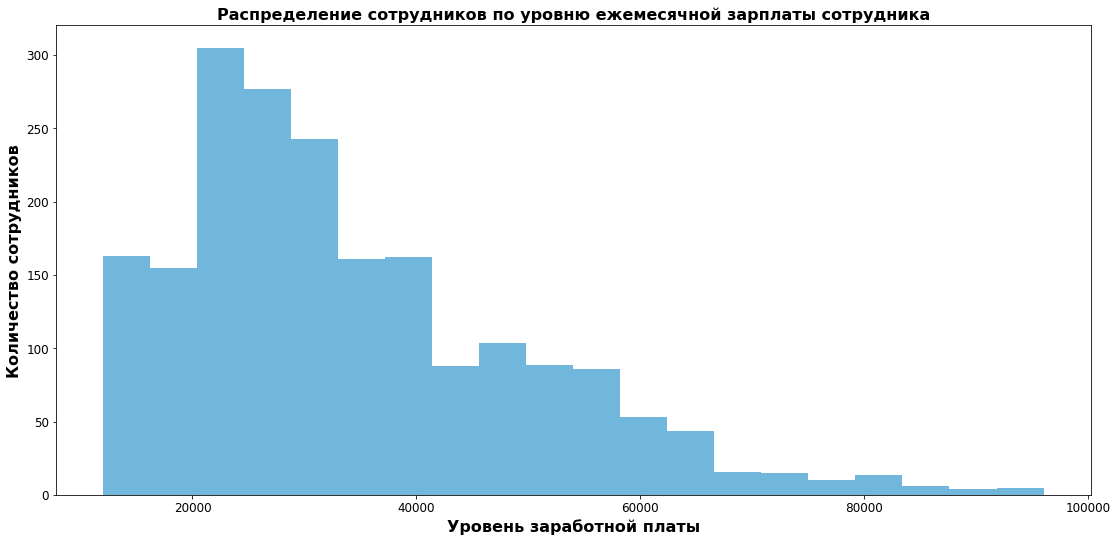

In [50]:
file=test_features
column='salary'
title='Распределение сотрудников по уровню ежемесячной зарплаты сотрудника'
xlabel='Уровень заработной платы'
ylabel='Количество сотрудников'
bins=20
bar_chart(file, column, title, xlabel, ylabel, bins)

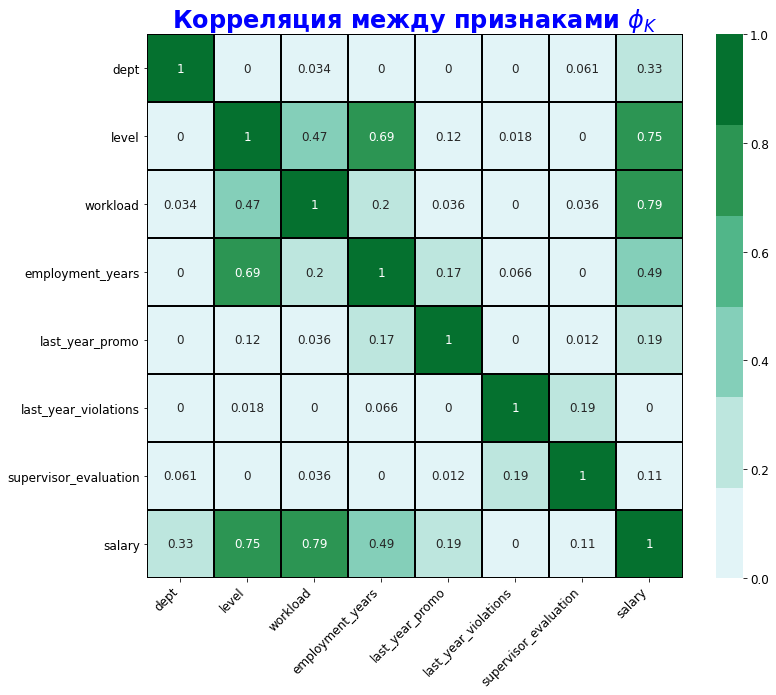

In [51]:
file = test_features[test_features.columns[test_features.columns != 'id']]

all_features = list(file.columns)

correlation = file[all_features].phik_matrix(interval_cols = [ 'salary', 'job_satisfaction_rate'])

plt.figure(figsize=(12,10))
colormap = sns.color_palette("BuGn")
plt.rc('font', size= 12)
chart = sns.heatmap(correlation, annot=True, cmap=colormap, linewidths=1, linecolor='black')
plt.title(r'Корреляция между признаками $\phi_K$', fontsize=24, fontweight="bold", color='blue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_yticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

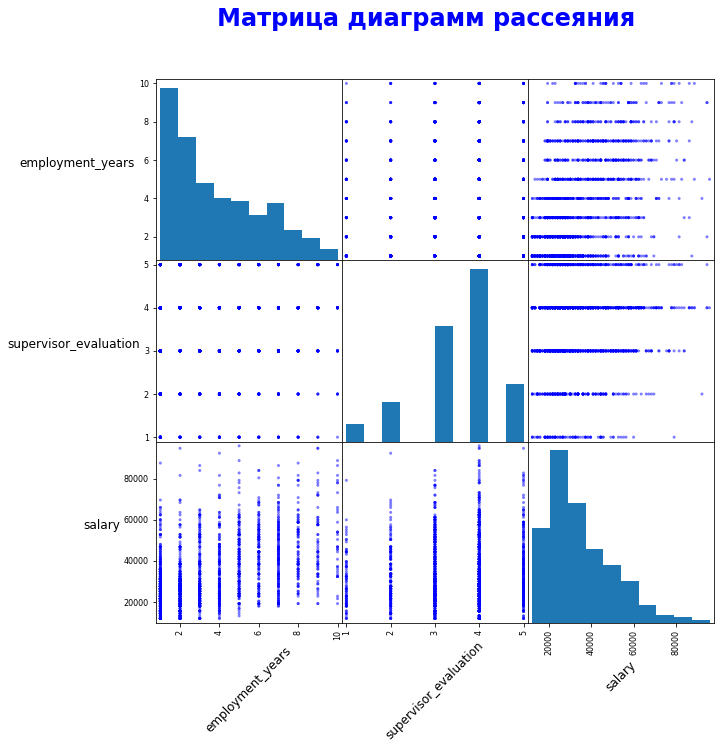

In [52]:
file = test_features

axes = pd.plotting.scatter_matrix(file[file.columns[file.columns != 'id']], figsize=(10, 10), color='blue')

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.suptitle('Матрица диаграмм рассеяния', fontsize=24, fontweight="bold", color='blue')
plt.show()

***Исследование показало наличие незначительного количества выбросов. Считаю это допустимым и удалять не будем. Остальных замечаний не выявлено.***

## Шаг 4. Подготовка данных

***Перечислим особенности данных:***  
1. Три признака:  
`dept`, `last_year_promo`, `last_year_violations` — нужно кодировать с помощью OneHotEncoder.
2. Два признака:
`level`, `workload` — нужно кодировать с помощью OrdinalEncoder.
2. Количественных 3 признака:  
`employment_years`, `supervisor_evaluation`, `salary` - нужно масштабировать.
3. В признаках пропуски встречаются и обработаем их в пайплайне.
4. Целевой признак — `job_satisfaction_rate`. Задачу мультиклассовой классификации тут рассматривать не будем.

***Так как мы удаляя признак `id` с неповторяющимися значениями получаем уменшение количества признаков. И могут появиться новые явные дубликаты: чем меньше признаков остаётся, тем выше шанс, что значения остальных признаков будут пересекаться. Проверим это и в дальнейшем удалим дубликаты.***

In [53]:
train_job_satisfaction_rate[train_job_satisfaction_rate.columns[train_job_satisfaction_rate.columns != 'id']].describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


In [54]:
train_job_satisfaction_rate[train_job_satisfaction_rate.columns[train_job_satisfaction_rate.columns != 'id']].duplicated().sum()

245

In [55]:
test_features[test_features.columns[test_features.columns != 'id']].describe()

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [56]:
test_target_job_satisfaction_rate[test_target_job_satisfaction_rate.columns[test_target_job_satisfaction_rate.columns != 'id']].describe()

,job_satisfaction_rate
count,2000.00000
mean,0.54878
std,0.22011
min,0.03000
25%,0.38000
50%,0.58000
75%,0.72000
max,1.00000


## Шаг 5. Обучение моделей

In [57]:
all_target_features = test_target_job_satisfaction_rate.merge(test_features, on='id', how='left')
display(all_target_features.head())
all_target_features[all_target_features.columns[all_target_features.columns != 'id']].describe()

,id,job_satisfaction_rate,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,130604,0.74,technology,junior,medium,1,no,no,4,34800
1,825977,0.75,marketing,middle,high,7,no,no,5,58800
2,418490,0.60,purchasing,junior,low,1,no,no,4,19200
3,555320,0.72,technology,junior,medium,1,no,no,4,34800
4,826430,0.08,technology,junior,medium,1,no,yes,2,30000


,job_satisfaction_rate,employment_years,supervisor_evaluation,salary
count,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.54878,3.666500,3.526500,34066.800000
std,0.22011,2.537222,0.996892,15398.436729
min,0.03000,1.000000,1.000000,12000.000000
25%,0.38000,1.000000,3.000000,22800.000000
50%,0.58000,3.000000,4.000000,30000.000000
75%,0.72000,6.000000,4.000000,43200.000000
max,1.00000,10.000000,5.000000,96000.000000


In [58]:
train_1 = train_job_satisfaction_rate.drop(['id'], axis=1)
train_1.drop_duplicates(inplace=True)

test_1 = all_target_features.drop(['job_satisfaction_rate','id'], axis=1)

target_1 = all_target_features['job_satisfaction_rate'] 

In [59]:
X_train = train_1.drop('job_satisfaction_rate', axis=1)
y_train = train_1['job_satisfaction_rate'] 
X_test = test_1
y_test = target_1

ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'], 
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),

    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])
 
param_grid = [

    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 21),
        'models__min_samples_split': range(2, 21),
        'models__max_features': range(2, 21),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
   
smape_scorer = make_scorer(score_func=smape, greater_is_better=False)

# выберем лучшую модель и параметры с помощью RandomizedSearchCV()
r_search = RandomizedSearchCV(
    pipe_final, 
    param_grid,
    n_iter=10,
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
# обучаем лучшую модель на тренировочных данных
r_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [DecisionTreeRegressor(random_state=100)],
                                         'models__max_depth': range(2, 21),
                                         'models__max_features': range(2, 21),
                                         'models__min_samples_split': range(2, 21),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=100,
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [60]:
best_model = r_search.best_estimator_
print('Лучшая модель и её параметры:\n\n', r_search.best_estimator_)
print ('Метрика лучшей модели по кросс-валидации на обучающих данных:', r_search.best_score_*(-1))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [61]:
best_model = r_search.best_estimator_
print(f'Метрика sMAPE лучшей модели по кросс-валидации на обучающих данных: {round(r_search.best_score_*(-1),4)}')

Метрика sMAPE лучшей модели по кросс-валидации на обучающих данных: 15.1814


In [62]:
print(f'Метрика sMAPE лучшей модели на тестовой выборке: {round(smape(y_test, best_model.predict(X_test)),4)}')

Метрика sMAPE лучшей модели на тестовой выборке: 13.6159


In [63]:
# Используем лучшую модель для предсказания значений на тестовом наборе данных
y_pred = best_model.predict(X_test)

# Вычисляем метрику sMAPE между фактическими значениями и предсказанными значениями
test_smape = smape(y_test, y_pred)

In [64]:
# Обучение и оценка модели с использованием DummyRegressor
dummy_regressor = DummyRegressor(strategy='mean')
dummy_pipe = Pipeline([
    ('preprocessor', data_preprocessor),
    ('dummy_model', dummy_regressor)
])

# Обучение DummyRegressor
dummy_pipe.fit(X_train, y_train)
y_dummy_pred = dummy_pipe.predict(X_test)
dummy_smape = smape(y_test, y_dummy_pred)
print(f"sMAPE for DummyRegressor на тестовых данных: {dummy_smape}")

sMAPE for DummyRegressor на тестовых данных: 38.26225790202238


In [65]:
# Сравнение результатов
print("Сравнение моделей:")
print(f"Лучший sMAPE модели: {test_smape}")
print(f"sMAPE DummyRegressor: {dummy_smape}")

if test_smape < dummy_smape:
    print("Модель работает лучше, чем DummyRegressor.")
else:
    print("Модель не работает лучше, чем DummyRegressor.")

Сравнение моделей:
Лучший sMAPE модели: 13.615871648798223
sMAPE DummyRegressor: 38.26225790202238
Модель работает лучше, чем DummyRegressor.


Так как моя модель показала sMAPE 13,6, что в 2,8 раза меньше, чем модель DummyRegressor. Значит она способна предсказывать значения более точно и являются более эффективными.

## Шаг 6. Оформление выводов

Для поиска лучшей модели были предприняты следующие шаги:

- проведено исследование полученных даных и признаков
- в процессе поиска к данным применено 2 типа моделей классифкации
- на основе метрики `SMAPE` была отобрана лучшая модель  ('models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 21),
        'models__min_samples_split': range(2, 21),
        'models__max_features': range(2, 21),) c использованием пайплайна
- метрика `SMAPE` лучшей модели на тестовой выборке составила: 13.62
- доказали, что моя модель предсказывает значения эффективно в сравнении с `DummyRegressor`

## Задача 2

## Шаг 1. Загрузка данных

Тренировочная выборка:

`train_quit.csv`

Входные признаки тестовой выборки те же, что и в прошлой задаче:

`test_features.csv`

Целевой признак тестовой выборки:

`test_target_quit.csv`


In [66]:
train_quit = pd.read_csv('/datasets/train_quit.csv')
test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')

In [67]:
descr(train_quit)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

Количество дубликатов: 0
Количество пропусков: id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64


In [68]:
descr(test_features)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1997 non-null   object
 2   level                  1999 non-null   object
 3   workload               1999 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

Количество дубликатов: 0
Количество пропусков: id                       0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


In [69]:
descr(test_target_quit)

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

Количество дубликатов: 0
Количество пропусков: id      0
quit    0
dtype: int64


***Провели анализ полученных данных. Значимых замечаний не выявлено.***

## Шаг 2. Предобработка данных

In [71]:
for col in test_features.iloc[:, 1:8]:
    print(test_features[col].unique ())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
['junior' 'middle' 'senior' nan]
['medium' 'low' 'high' nan]
[ 2  1  5  6  3  9  7  4  8 10]
['no' 'yes']
['no' 'yes']
[5 4 3 1 2]


In [72]:
test_features['dept'] = test_features['dept'].replace(' ', np.nan)
test_features['workload'] = test_features['workload'].replace(' ', np.nan)

In [73]:
for col in test_features.iloc[:, 1:8]:
    print(test_features[col].unique())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
['junior' 'middle' 'senior' nan]
['medium' 'low' 'high' nan]
[ 2  1  5  6  3  9  7  4  8 10]
['no' 'yes']
['no' 'yes']
[5 4 3 1 2]


In [74]:
test_features['dept'] = test_features['dept'].replace(' ', np.nan)
test_features['workload'] = test_features['workload'].replace(' ', np.nan)
for col in test_features.iloc[:, 1:8]:
    print(test_features[col].unique ())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
['junior' 'middle' 'senior' nan]
['medium' 'low' 'high' nan]
[ 2  1  5  6  3  9  7  4  8 10]
['no' 'yes']
['no' 'yes']
[5 4 3 1 2]


In [75]:
test_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [76]:
test_target_quit.isna().sum()

id      0
quit    0
dtype: int64

In [77]:
test_target_quit.duplicated().sum()

0

Выведем количество дубликатов в столбце id

In [78]:
duplicate_id = test_target_quit[test_target_quit.duplicated(['id'])]

print(duplicate_id)

Empty DataFrame
Columns: [id, quit]
Index: []


Провели предобработку полученных данных. Дубликаты не обнаружены. Выявлены пропуски и пробелы в данных. Проведем замену пробелов ' ' на np.nan пропуск. Проведем в дальнейшем заполнение пропусков в пайплайне при обучении модели с использованием SimpleImputer в категориальных признаках на самое распростроненное значение.

## Шаг 3. Исследовательский анализ данных

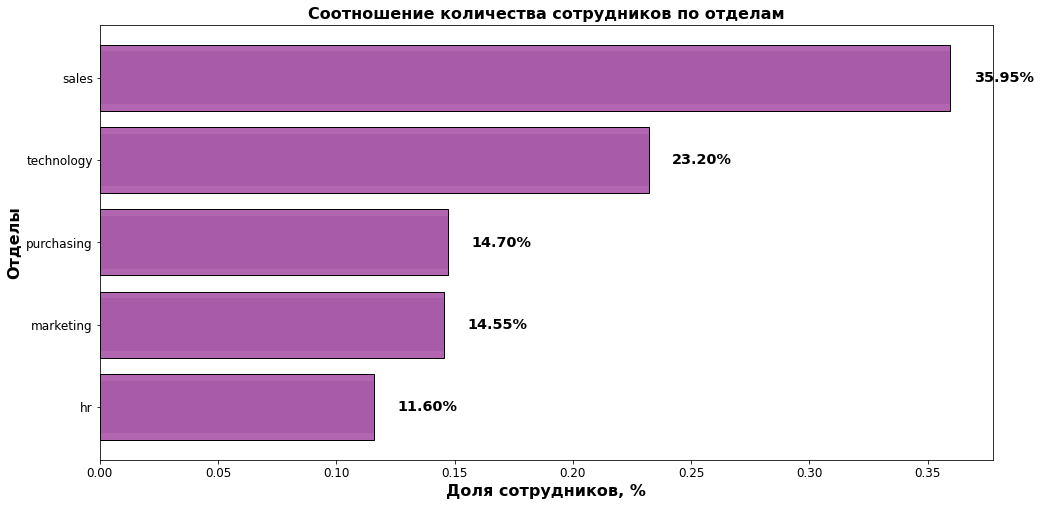

In [79]:
file=train_quit
column='dept'
title='Соотношение количества сотрудников по отделам'
xlabel='Доля сотрудников, %'
ylabel='Отделы'
diagram(file, column, title, xlabel, ylabel)

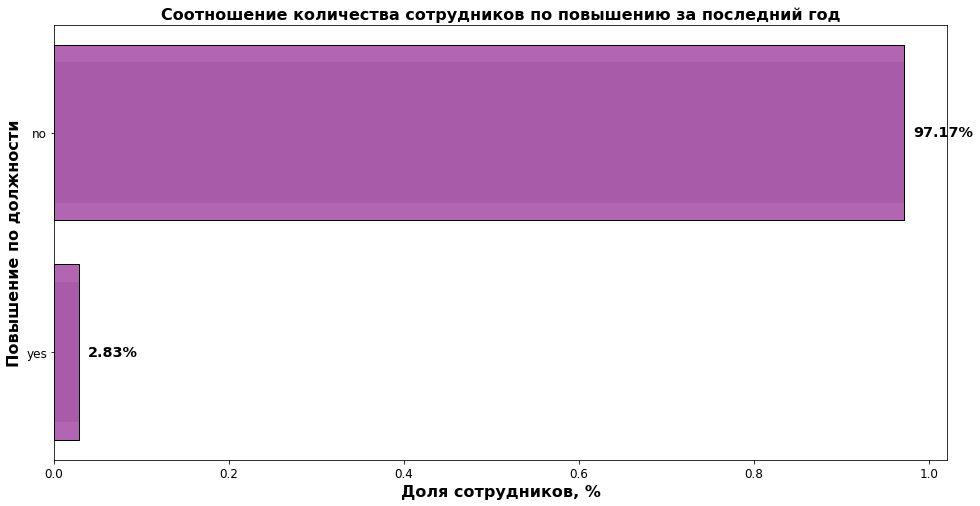

In [80]:
file=train_quit
column='last_year_promo'
title='Соотношение количества сотрудников по повышению за последний год'
xlabel='Доля сотрудников, %'
ylabel='Повышение по должности'
diagram(file, column, title, xlabel, ylabel)

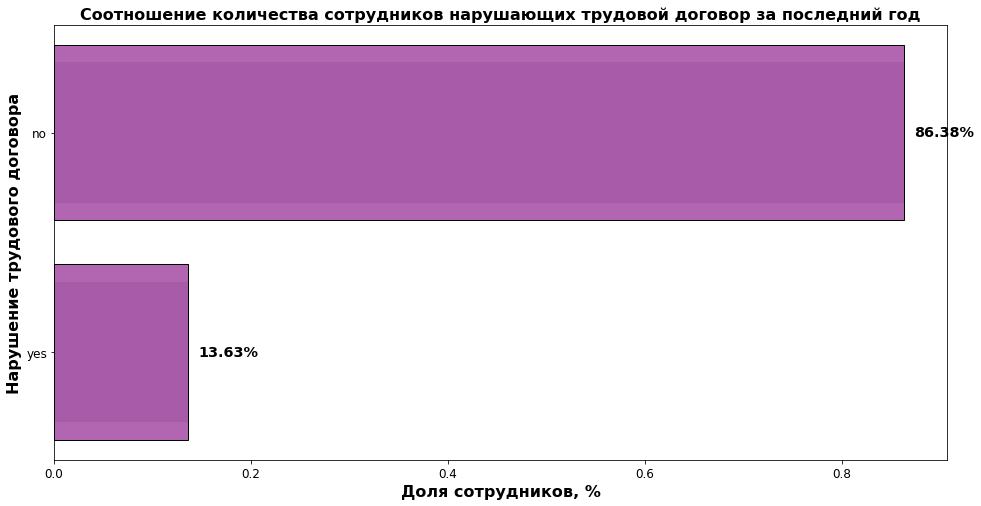

In [81]:
file=train_quit
column='last_year_violations'
title='Соотношение количества сотрудников нарушающих трудовой договор за последний год'
xlabel='Доля сотрудников, %'
ylabel='Нарушение трудового договора'
diagram(file, column, title, xlabel, ylabel)

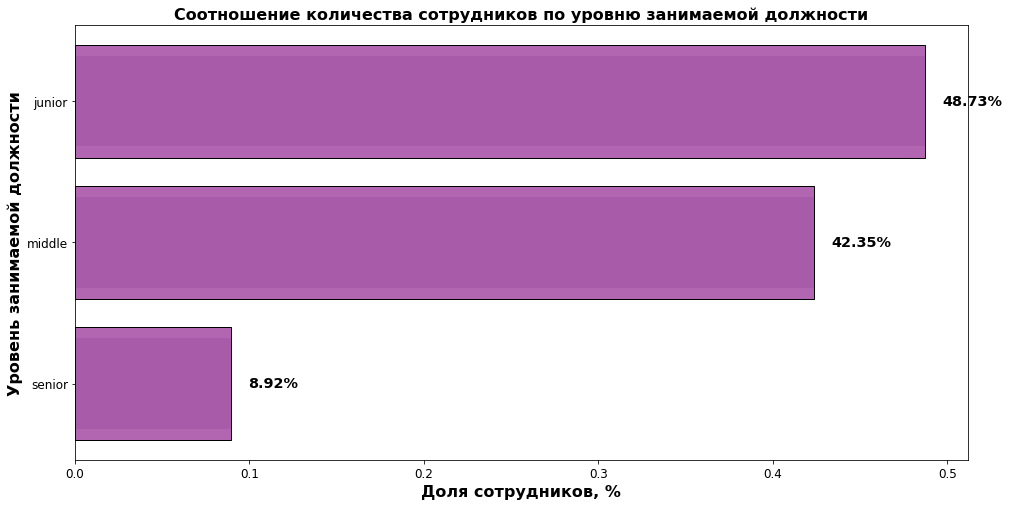

In [82]:
file=train_quit
column='level'
title='Соотношение количества сотрудников по уровню занимаемой должности'
xlabel='Доля сотрудников, %'
ylabel='Уровень занимаемой должности'
diagram(file, column, title, xlabel, ylabel)

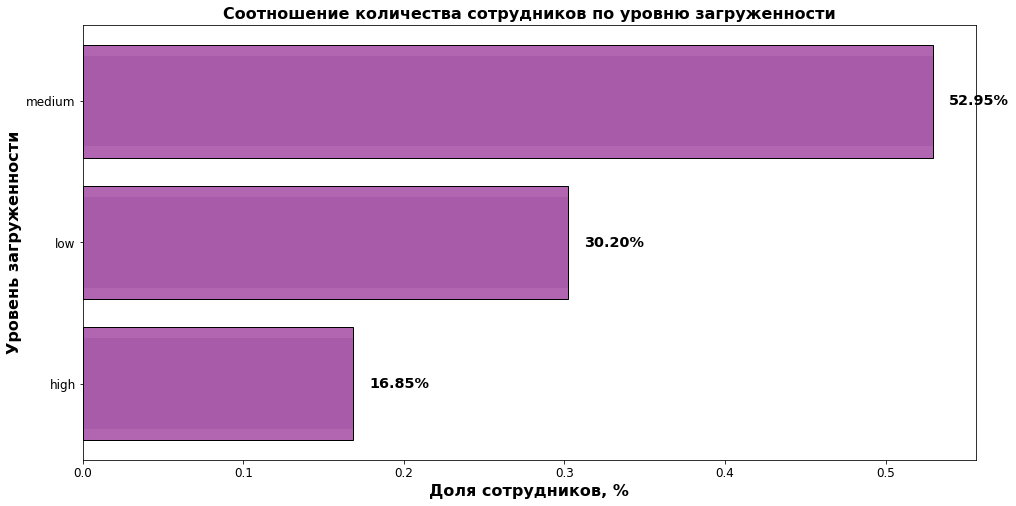

In [83]:
file=train_quit
column='workload'
title='Соотношение количества сотрудников по уровню загруженности'
xlabel='Доля сотрудников, %'
ylabel='Уровень загруженности'
diagram(file, column, title, xlabel, ylabel)

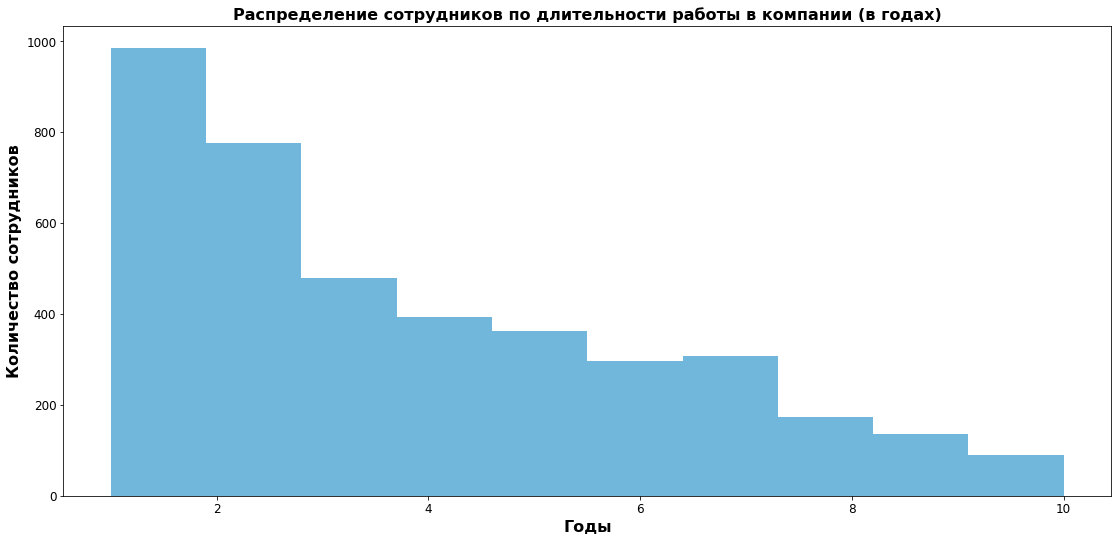

In [84]:
file=train_quit
column='employment_years'
title='Распределение сотрудников по длительности работы в компании (в годах)'
xlabel='Годы'
ylabel='Количество сотрудников'
bins=10
bar_chart(file, column, title, xlabel, ylabel, bins)

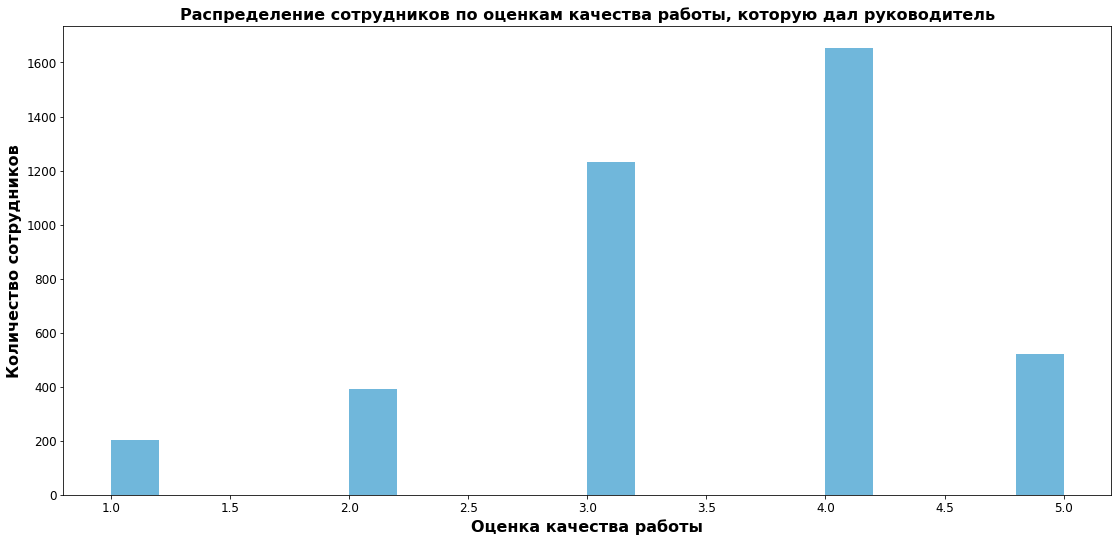

In [85]:
file=train_quit
column='supervisor_evaluation'
title='Распределение сотрудников по оценкам качества работы, которую дал руководитель'
xlabel='Оценка качества работы'
ylabel='Количество сотрудников'
bins=20
bar_chart(file, column, title, xlabel, ylabel, bins)

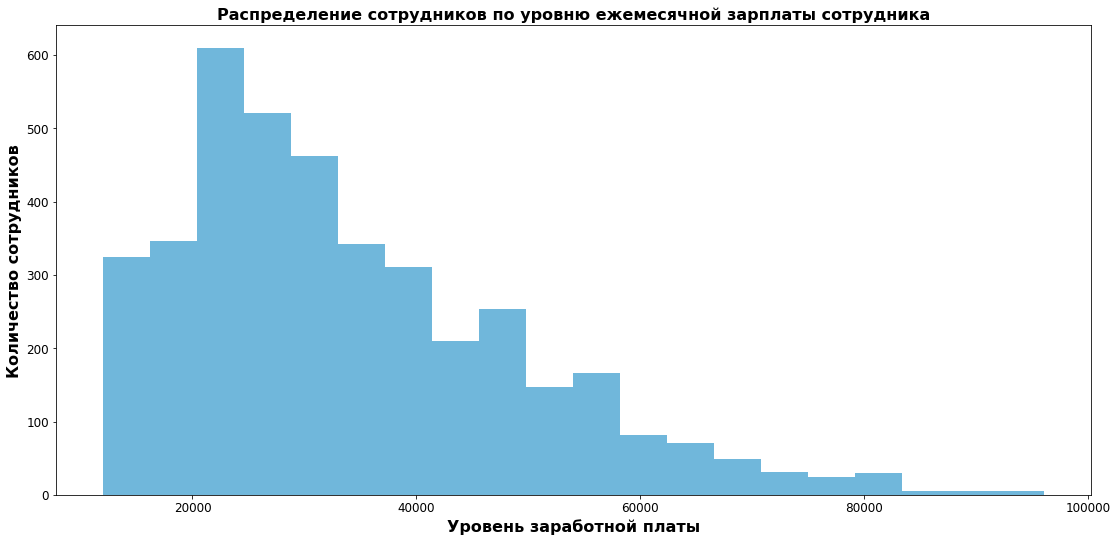

In [86]:
file=train_quit
column='salary'
title='Распределение сотрудников по уровню ежемесячной зарплаты сотрудника'
xlabel='Уровень заработной платы'
ylabel='Количество сотрудников'
bins=20
bar_chart(file, column, title, xlabel, ylabel, bins)

file=train_quit
column='quit'
title='Соотношение количества сотрудников уволенных из компании'
xlabel='Доля сотрудников, %'
ylabel='Увольнение'
diagram(file, column, title, xlabel, ylabel)

<div style="background-color: rgba(128, 0, 128, 0.1); padding: 10px; border-radius: 5px;">
<font size="5"><b>Комментарий студента</b></font>

Удалено.

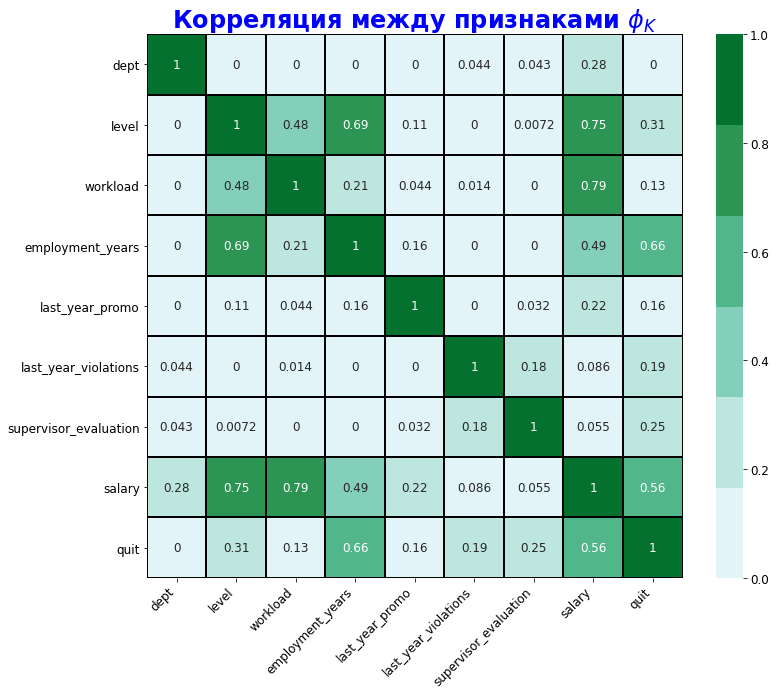

In [87]:
file = train_quit[train_quit.columns[file.columns != 'id']]

all_features = list(file.columns)

correlation = file[all_features].phik_matrix(interval_cols = ['salary', 'job_satisfaction_rate'])

plt.figure(figsize=(12,10))
colormap = sns.color_palette("BuGn")
plt.rc('font', size= 12)
chart = sns.heatmap(correlation, annot=True, cmap=colormap, linewidths=1, linecolor='black')
plt.title(r'Корреляция между признаками $\phi_K$', fontsize=24, fontweight="bold", color='blue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_yticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

После исследования данных в   `train_quit`, особой разницы между исследуемыми данными и данными с анализа `job_satisfaction` не нашли. Стоит отметить только что признак `quit` достаточно высокий и коррелируется с заарплатой и проработанным количеством лет.

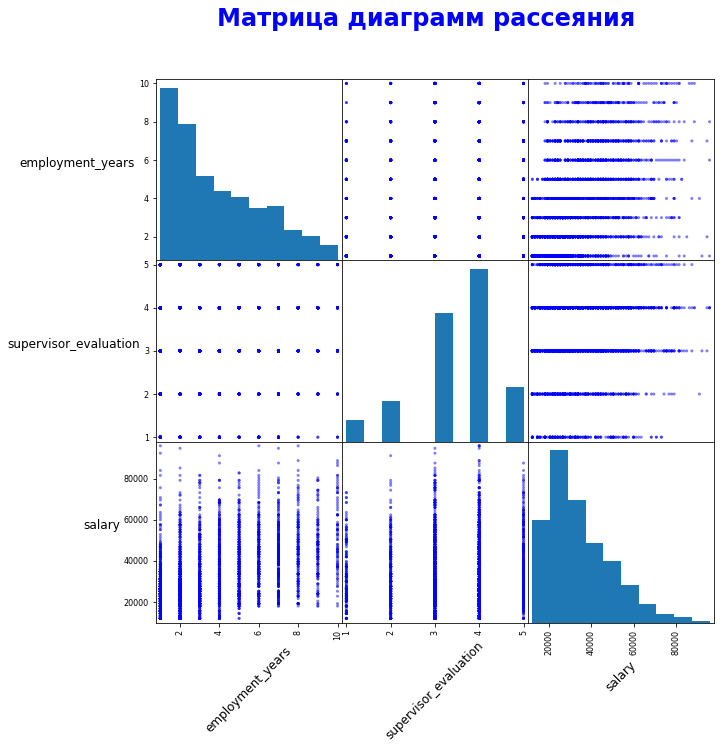

In [88]:
file = train_quit

axes = pd.plotting.scatter_matrix(file[file.columns[file.columns != 'id']], figsize=(10, 10), color='blue')

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.suptitle('Матрица диаграмм рассеяния', fontsize=24, fontweight="bold", color='blue')
plt.show()

Исследование показало наличие незначительного количества выбросов. Считаю это допустимым и удалять не будем. Остальных замечаний не выявлено.

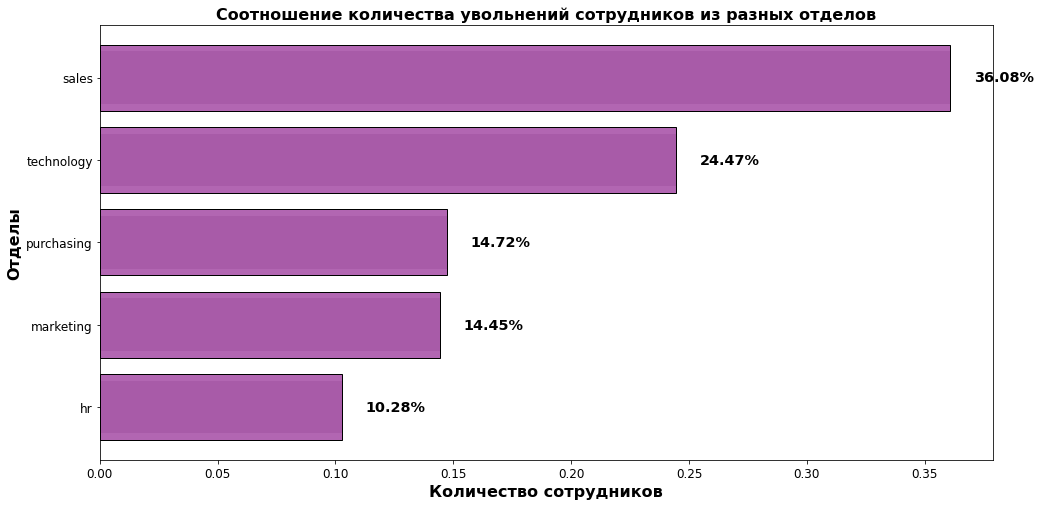

In [89]:
file=train_quit[train_quit['quit'] == 'yes']
column='dept'
title='Соотношение количества увольнений сотрудников из разных отделов'
xlabel='Количество сотрудников'
ylabel='Отделы'
diagram(file, column, title, xlabel, ylabel)

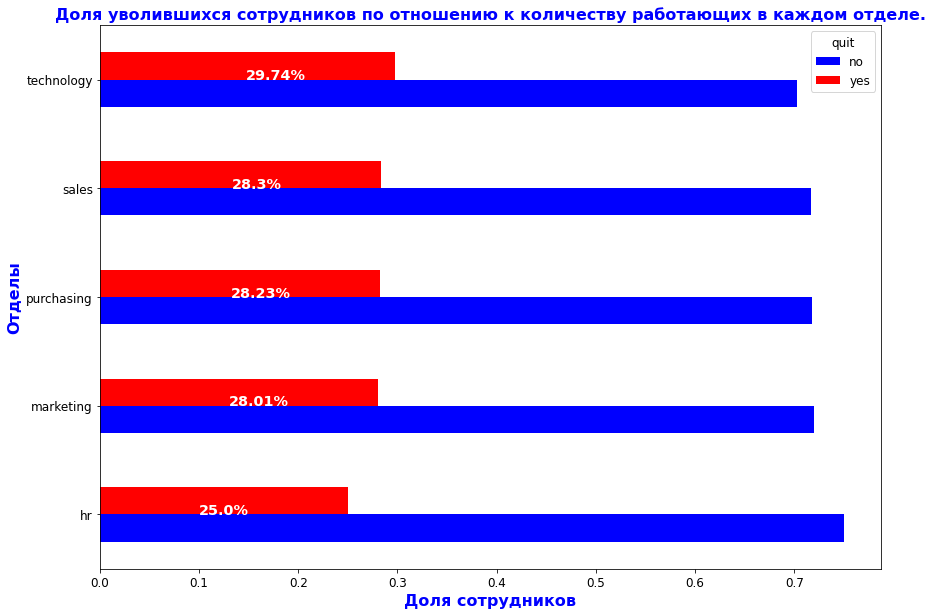

In [90]:
file_groupby = train_quit.groupby(['dept'])['quit'].value_counts(normalize=True)

file_groupby_sort = file_groupby.sort_values()
mm = file_groupby_sort.unstack().plot(kind='barh', figsize=(14,10), color=['blue', 'red'])
plt.title('Доля уволившихся сотрудников по отношению к количеству работающих в каждом отделе.', fontsize=16, fontweight="bold", color='blue')
plt.xlabel('Доля сотрудников', fontsize=16, fontweight="bold", color='blue')
plt.ylabel('Отделы', fontsize=16, fontweight="bold", color='blue')
   
percent = dict(file_groupby_sort)
row = 0
i = 0
for row in percent:
    if percent[row] < 0.5:
        mm.text(percent[row]-0.15, i, str(round(percent[row]*100, 2)) + '%',
                  fontsize = 'large', fontweight='bold', color='white')
    i += 1    

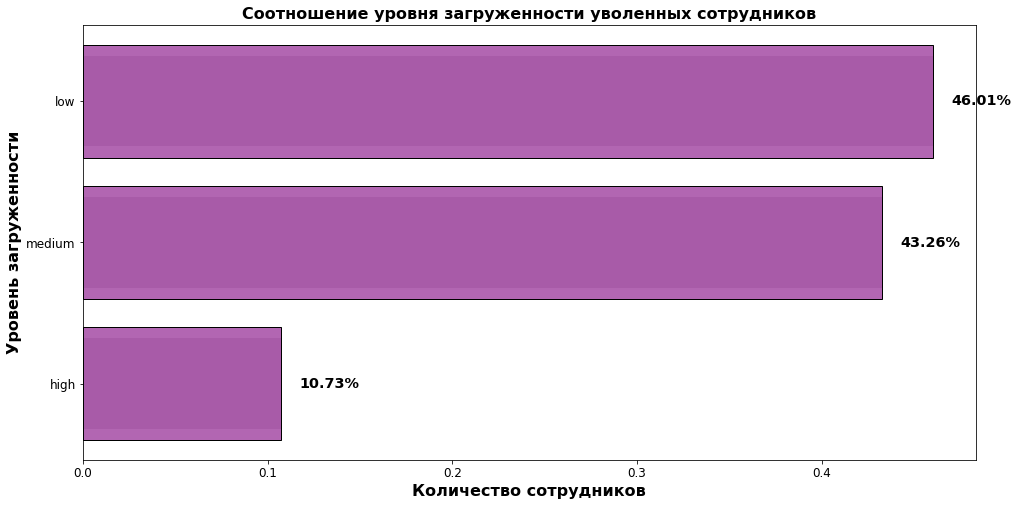

In [91]:
file=train_quit[train_quit['quit'] == 'yes']
column='workload'
title='Соотношение уровня загруженности уволенных сотрудников'
xlabel='Количество сотрудников'
ylabel='Уровень загруженности'
diagram(file, column, title, xlabel, ylabel)

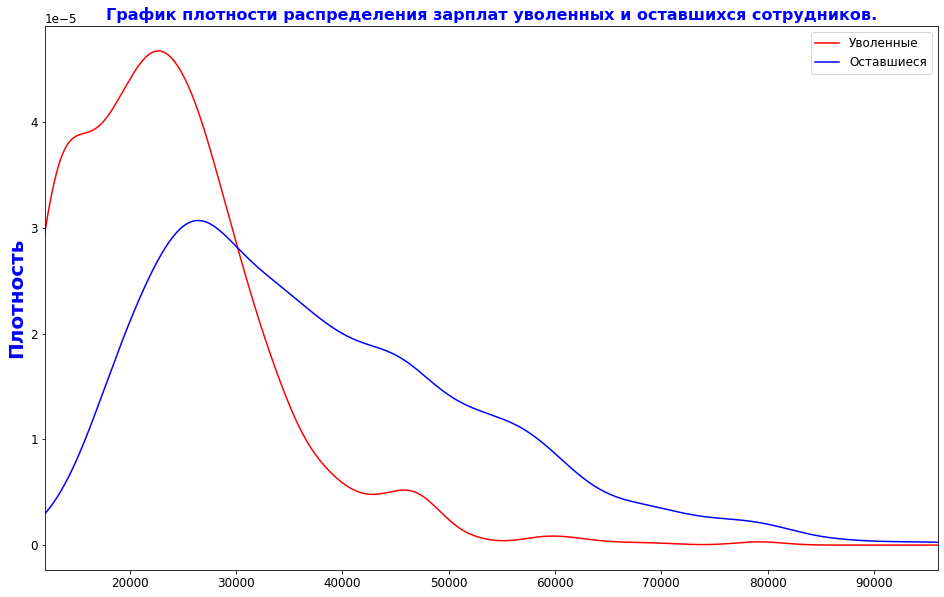

In [92]:
plt.figure(figsize=(16,10))
plt.title('График плотности распределения зарплат уволенных и оставшихся сотрудников.', fontsize=16, fontweight="bold", color='blue')
plt.xlim (train_quit['salary'].min(), train_quit['salary'].max())
ax = train_quit['salary'][train_quit['quit'] == 'yes'].plot.kde(color='red', label='Уволенные')
ax = train_quit['salary'][train_quit['quit'] == 'no'].plot.kde(color='blue', label='Оставшиеся')
ax.set_ylabel('Плотность', fontsize=20, fontweight="bold", color='blue')
# Добавление легенды
plt.legend()


None

Поделим train_quit на вспомогательные таблицы - в одной ушедшие во второй оставшиеся.

In [93]:
df=train_quit[train_quit['quit'] == 'yes']

In [94]:
df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
5,699916,sales,junior,low,1,no,yes,3,18000,yes
9,613206,technology,middle,medium,2,no,no,3,45600,yes
24,468145,technology,junior,medium,2,no,no,3,30000,yes
25,982346,marketing,junior,medium,3,no,no,3,30000,yes


In [95]:
# создадим список перемен
num=['salary']
# создадим список с названиями графиков 
titles_num= ['длительность работы в компании', 'оценка качества работы сотрудника', 'ежемесячная зарплата сотрудника']

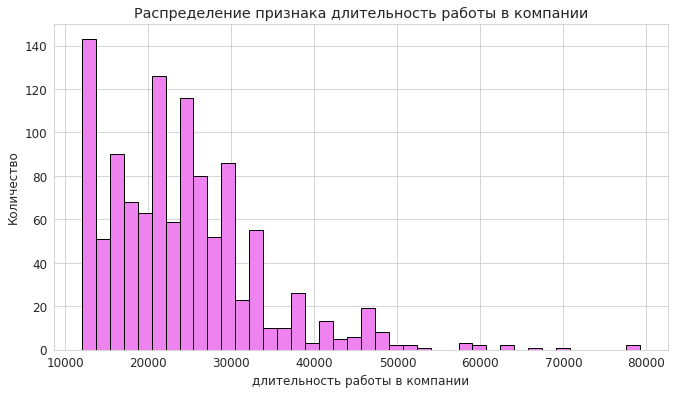

count     1128.000000
mean     23885.106383
std       9351.599505
min      12000.000000
25%      16800.000000
50%      22800.000000
75%      27600.000000
max      79200.000000
Name: salary, dtype: float64


In [96]:
#Построим гистограммы и рассмотрим mean,  median, min, max
for i in range(len(num)):
    sns.set_style('whitegrid')
    plt.figure(figsize=(11, 6))
    plt.hist(df[num[i]], color = 'violet', edgecolor = 'black', bins = 40)
    plt.title(f"Распределение признака {titles_num[i]}")
    plt.ylabel("Количество")
    plt.xlabel(titles_num[i])
    plt.show()
    print(df[num[i]].describe())

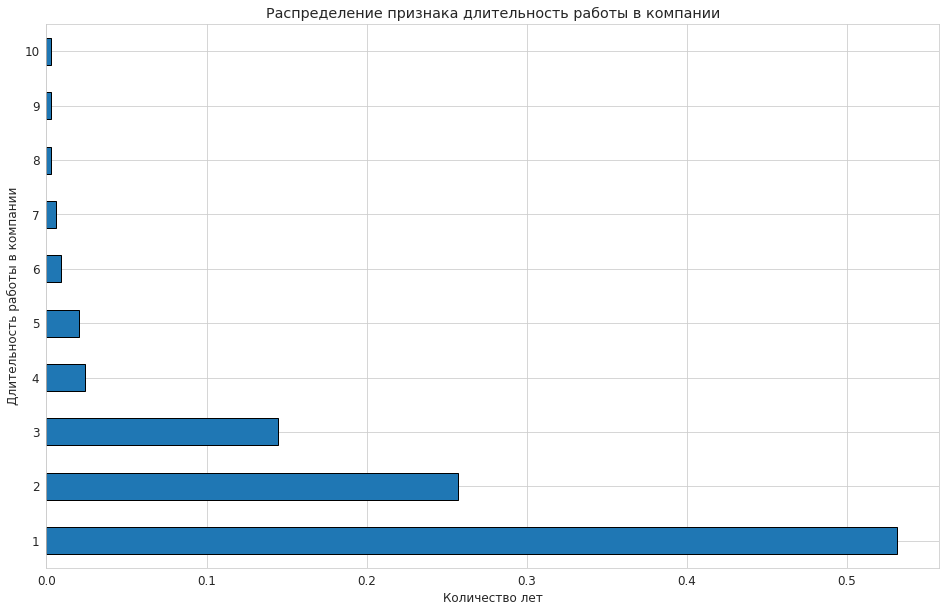

count    1128.000000
mean        1.844858
std         1.274920
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: employment_years, dtype: float64


In [97]:
df['employment_years'].value_counts(normalize=True).plot(kind='barh', figsize=(16,10),  ec ='black', grid=True)
plt.title(f'Распределение признака длительность работы в компании')
plt.xlabel('Количество лет')
plt.ylabel('Длительность работы в компании')
plt.show()
print(df['employment_years'].describe())

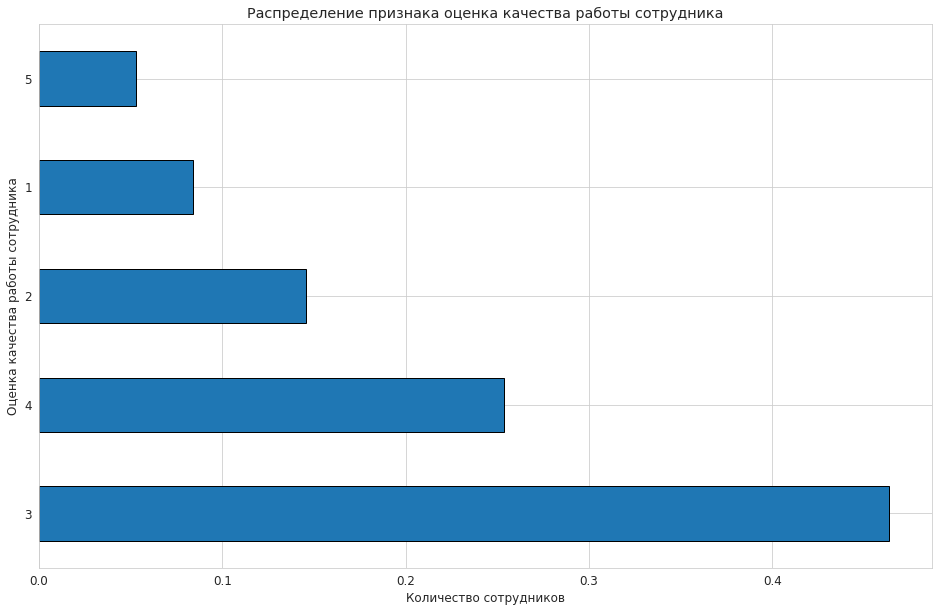

count    1128.000000
mean        3.046099
std         0.973291
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


In [98]:
df['supervisor_evaluation'].value_counts(normalize=True).plot(kind='barh', figsize=(16,10),  ec ='black', grid=True)
plt.title(f'Распределение признака оценка качества работы сотрудника')
plt.xlabel('Количество сотрудников')
plt.ylabel('Оценка качества работы сотрудника')
plt.show()
print(df['supervisor_evaluation'].describe())

In [99]:
# создадим список с категориальных перемен
cat=['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
# создадим список с названиями графиков 
titles_cat= ['отдел, в котором работает сотрудник', 
             'уровень занимаемой должности', 
             'уровень загруженности сотрудника', 
             'было ли повышение за последний год', 
             'нарушал ли сотрудник трудовой договор за последний год']

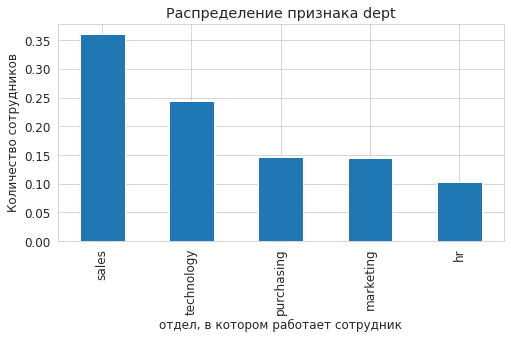

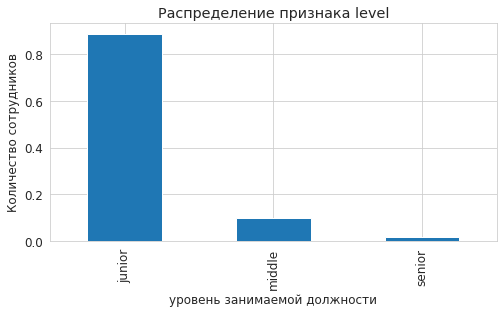

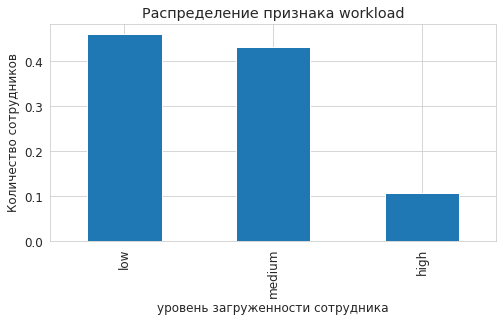

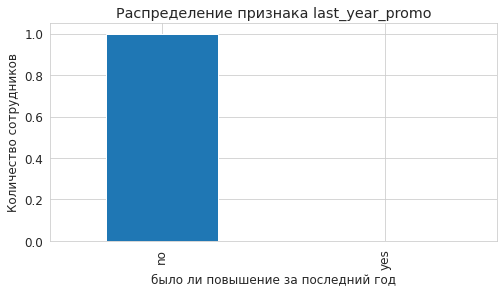

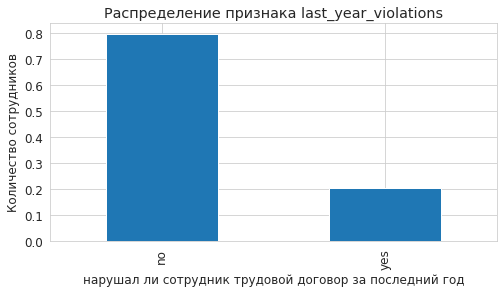

In [100]:
for i in range(len(cat)):
    plt.figure(figsize=(8, 4))
    df[cat[i]].value_counts(normalize=True).plot.bar()
    plt.title(f"Распределение признака {cat[i]}")
    plt.xlabel(titles_cat[i])
    plt.ylabel('Количество сотрудников', size=12)
    plt.show()

Анализируя категориальные признаки во вспомогательной таблице ушедших работников мы видим что больше всего ушедших работников в отделе продаж, junior, с низким уровнем загруженности, без повышения за последний год .

Также мы видим что уровень зарплаты уволенных в среднем на 10000 рублей ниже, оценка качества работников это 3 бала, длительность работы в основном 1 год.

In [101]:
df_1 = test_target_job_satisfaction_rate.merge(test_target_quit, on='id')
df_yes=df_1[df_1['quit'] == 'yes']
df_no=df_1[df_1['quit'] == 'no']

In [102]:
df_yes.head()

,id,job_satisfaction_rate,quit
2,418490,0.60,yes
4,826430,0.08,yes
20,508688,0.58,yes
29,343440,0.35,yes
30,622918,0.77,yes


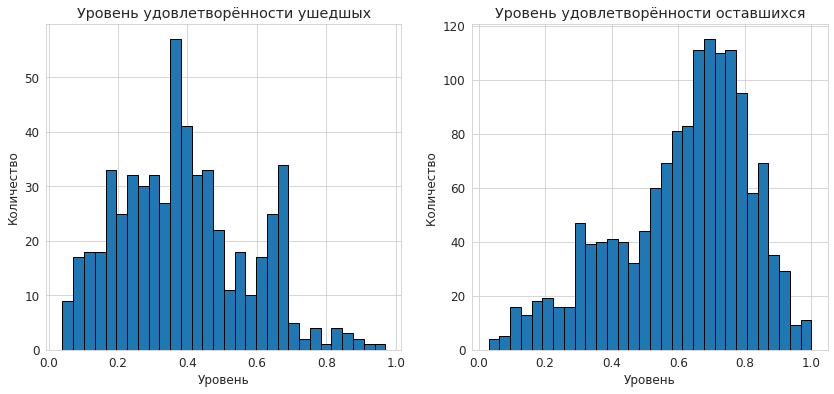

count    564.000000
mean       0.387713
std        0.185784
min        0.040000
25%        0.240000
50%        0.370000
75%        0.492500
max        0.970000
Name: job_satisfaction_rate, dtype: float64


count    1436.000000
mean        0.612040
std         0.199367
min         0.030000
25%         0.500000
50%         0.660000
75%         0.760000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(df_yes['job_satisfaction_rate'], bins = 30, ec='black')
ax1.set_title('Уровень удовлетворённости ушедшых')
ax1.grid(True)
ax1.set_xlabel('Уровень')
ax1.set_ylabel('Количество')

ax2.hist(df_no['job_satisfaction_rate'], bins = 30,  ec='black')
ax2.set_title('Уровень удовлетворённости оставшихся')
ax2.grid(True)
ax2.set_xlabel('Уровень')
ax2.set_ylabel('Количество ')

plt.show()
print(df_yes['job_satisfaction_rate'].describe())
df_no['job_satisfaction_rate'].describe()

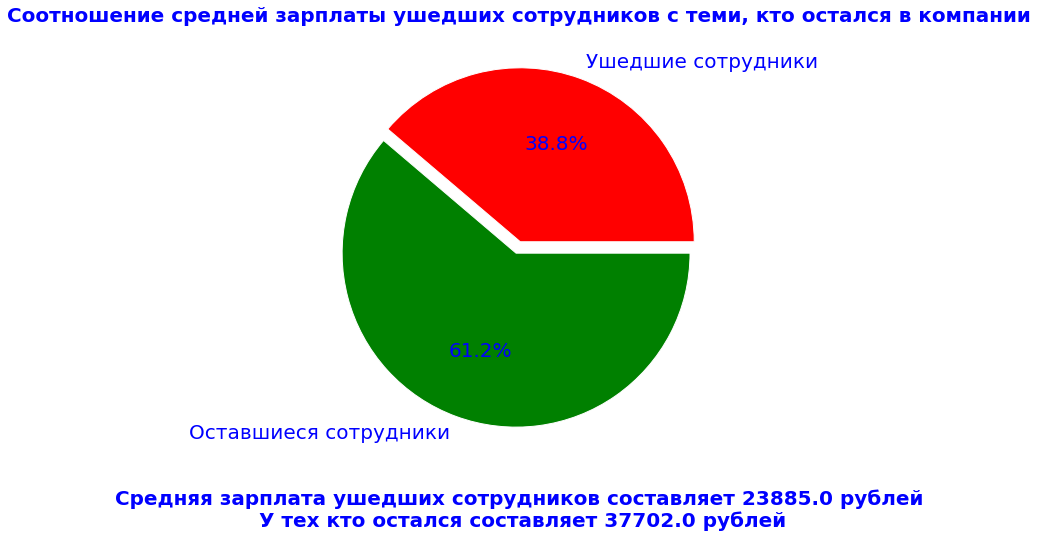

In [104]:
gone = train_quit['salary'][train_quit['quit'] == 'yes'].mean()
remained = train_quit['salary'][train_quit['quit'] == 'no'].mean()
data = [gone, remained]
labels = ['Ушедшие сотрудники', 'Оставшиеся сотрудники']
plt.figure(figsize=(8,8))
plt.rc('font', size= 20 ) 

fbcolor = ["red", "green"]

explode = [0.02, 0.05]

plt.pie(data, labels = labels, explode = explode, colors = fbcolor, autopct='%.1f%%', textprops={'color':'b'})
plt.title('Соотношение средней зарплаты ушедших сотрудников с теми, кто остался в компании', 
          fontsize=20, fontweight="bold", color='blue')
plt.xlabel(f'\nСредняя зарплата ушедших сотрудников составляет {round(gone,0)} рублей\n У тех кто остался составляет {round(remained,0)} рублей', fontsize=20, fontweight="bold", color='blue')
plt.show()

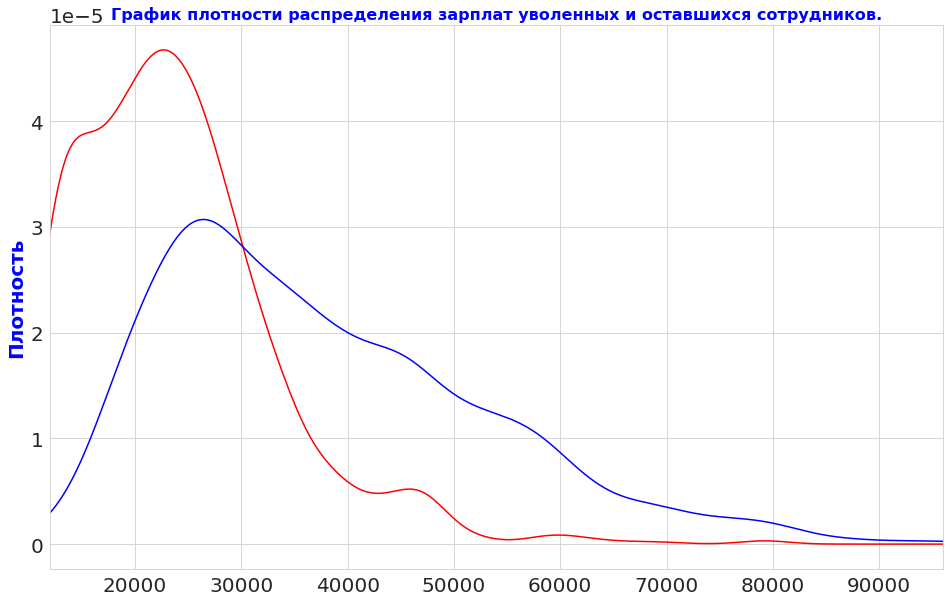

In [105]:
plt.figure(figsize=(16,10))
plt.title('График плотности распределения зарплат уволенных и оставшихся сотрудников.', fontsize=16, fontweight="bold", color='blue')
plt.xlim (train_quit['salary'].min(), train_quit['salary'].max())
ax = train_quit['salary'][train_quit['quit'] == 'yes'].plot.kde(color='red',label='Уволенные')
ax = train_quit['salary'][train_quit['quit'] == 'no'].plot.kde(color='blue', label='Оставшиеся')
ax.set_ylabel('Плотность', fontsize=20, fontweight="bold", color='blue')

None

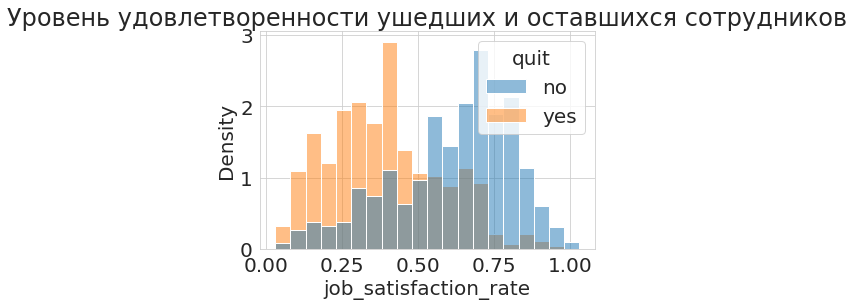

In [106]:
sns.histplot(data=df_1, x="job_satisfaction_rate", binwidth=0.05, hue="quit", stat='density', common_norm=False).set (title='Уровень удовлетворенности ушедших и оставшихся сотрудников')
plt.show()

Анализируя категориальные признаки во вспомогательной таблице ушедших работников мы видим что больше всего ушедших работников в отделе продаж, junior, с низким уровнем загруженности, без повышения за последний год .

Также мы видим что уровень зарплаты уволенных в среднем на 10000 рублей ниже, оценка качества работников это 3 бала, длительность работы в основном 1 год.

Также стоит отметить что утверждение аналитиков подтверждаются - уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник, что подтверждается распределением признака. Средняя оценка для ушедших работников составила 0.387713 а для оставшихся 0.612040

Усилим наблюдения:

In [107]:
# Заработная плата уволенных сотрудников
salary_quit_yes = train_quit[train_quit['quit'] == 'yes']['salary']

# Заработная плата оставшихся сотрудников
salary_quit_no = train_quit[train_quit['quit'] == 'no']['salary']

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(salary_quit_yes, salary_quit_no, nan_policy='omit')

print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

T-статистика: -28.453921078814687
P-значение: 2.46413786798989e-162


Поскольку p-значение значительно меньше 0.05, мы отвергаем нулевую гипотезу. Это означает, что различия между заработной платой уволенных и оставшихся сотрудников являются статистически значимыми.

Высокое абсолютное значение t-статистики (-28.45) и очень низкое p-значение указывают на то, что заработная плата значительно различается между уволенными и оставшимися сотрудниками.

Значимые различия в заработной плате могут указывать на то, что заработная плата является важным фактором удовлетворенности работой и, возможно, влияет на решение сотрудников уйти или остаться в компании.

## Шаг 4. Добавление нового входного признака

In [108]:
train_quit['job_satisfaction_rate'] = best_model.predict(train_quit)
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.640000
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.840769
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.340000
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.690000


In [109]:
train_quit.sort_values(by = 'id', ascending = True)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
2600,100222,sales,junior,medium,3,no,no,2,20400,yes,0.320000
717,100459,purchasing,junior,medium,3,no,no,3,21600,yes,0.332222
2455,100469,marketing,junior,medium,1,no,no,4,28800,no,0.663000
1592,100601,technology,middle,high,4,no,no,4,68400,no,0.678000
2657,100858,sales,junior,medium,2,no,no,4,25200,yes,0.838750
...,...,...,...,...,...,...,...,...,...,...,...
2194,998517,purchasing,middle,low,5,no,no,3,19200,no,0.411000
3701,999003,hr,middle,low,3,no,no,2,24000,yes,0.151429
3364,999158,purchasing,junior,medium,1,no,yes,1,21600,yes,0.080000
18,999835,sales,junior,low,5,no,no,4,18000,no,0.865000


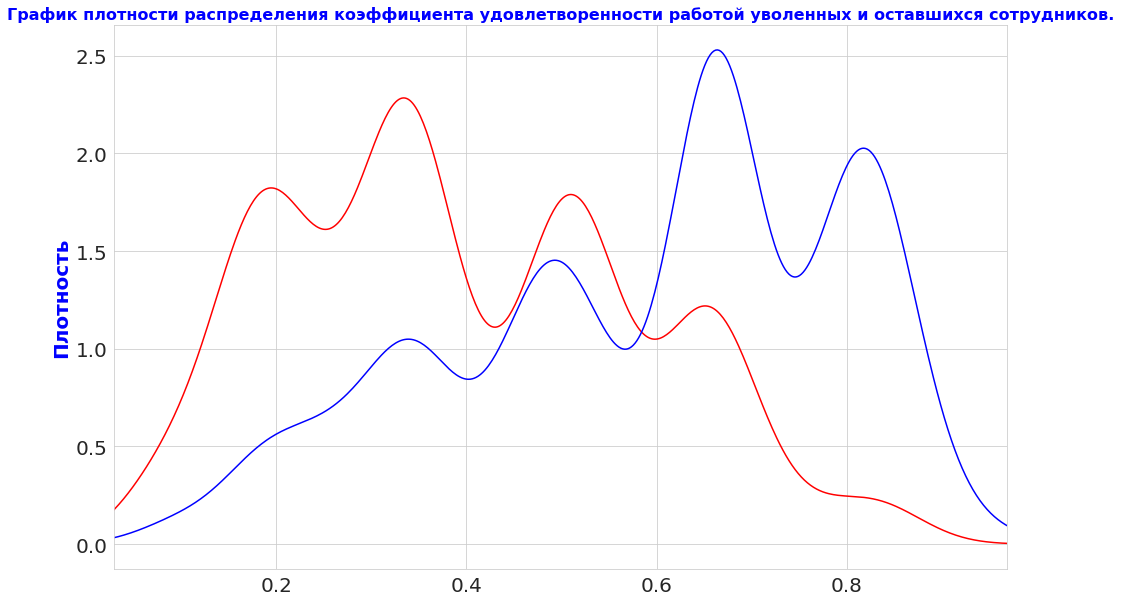

In [110]:
plt.figure(figsize=(16,10))
plt.title('График плотности распределения коэффициента удовлетворенности работой уволенных и оставшихся сотрудников.', fontsize=16, fontweight="bold", color='blue')
plt.xlim (train_quit['job_satisfaction_rate'].min(), train_quit['job_satisfaction_rate'].max())
ax = train_quit['job_satisfaction_rate'][train_quit['quit'] == 'yes'].plot.kde(color='red')
ax = train_quit['job_satisfaction_rate'][train_quit['quit'] == 'no'].plot.kde(color='blue')
ax.set_ylabel('Плотность', fontsize=20, fontweight="bold", color='blue')

None

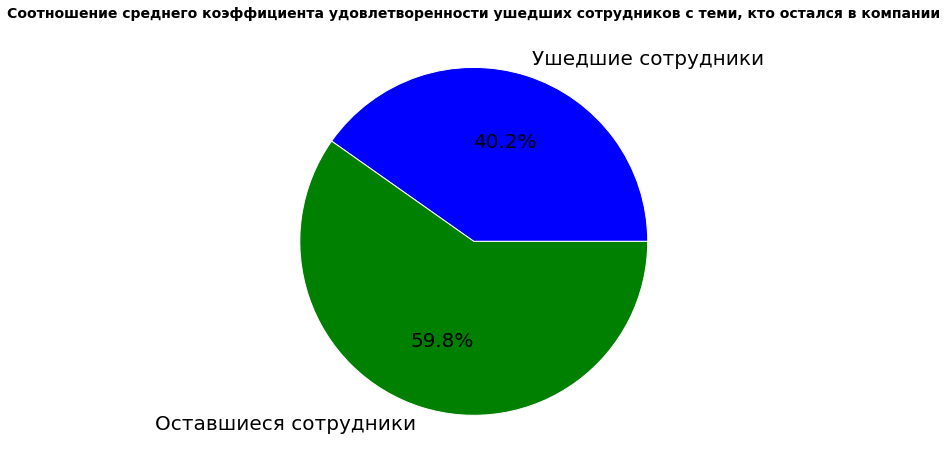

In [111]:
gone = train_quit['job_satisfaction_rate'][train_quit['quit'] == 'yes'].mean()
remained = train_quit['job_satisfaction_rate'][train_quit['quit'] == 'no'].mean()
data = [gone, remained]
labels = ['Ушедшие сотрудники', 'Оставшиеся сотрудники']
plt.figure(figsize=(8,8))
plt.rc('font', size= 20 ) 

fbcolor = ["blue", "green"]

plt.pie(data, labels = labels, colors = fbcolor, autopct='%.1f%%', textprops={'color':'black'}, normalize=True)
plt.title('Соотношение среднего коэффициента удовлетворенности ушедших сотрудников с теми, кто остался в компании', fontsize=14, fontweight="bold", color='black')

plt.show() 

Мы добавили новый признак а также вывели соотношение среднего коэфициента удовлетворенности между ушедшими и оставшимся. Как видим средний коэфициент удовлетворенности для ушедших составил всего 39.7%.

## Шаг 5. Подготовка данных

Три признака:
dept, last_year_promo, last_year_violations — нужно кодировать с помощью OneHotEncoder.
Два признака: level, workload — нужно кодировать с помощью OrdinalEncoder.

Количественных 4 признака:
employment_years, supervisor_evaluation, salary, job_satisfaction_rate - нужно масштабировать.

В признаках пропуски встречаются и обработаем их в пайплайне.

Целевой признак — quit. Задачу мультиклассовой классификации тут рассматривать не будем.

In [112]:
test_features['job_satisfaction_rate'] = best_model.predict(test_features)
test_features[test_features.columns[test_features.columns != 'id']].describe()
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.859091
1,686555,hr,junior,medium,1,no,no,4,30000,0.682222
2,467458,sales,middle,low,5,no,no,4,19200,0.652000
3,418655,sales,middle,low,6,no,no,4,19200,0.666000
4,789145,hr,middle,medium,5,no,no,5,40800,0.825556


## Шаг 6. Обучение моделей

In [113]:
all_features = test_target_quit.merge(test_features, on='id')
descr(all_features)
all_features 

,id,quit,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,999029,yes,technology,junior,medium,1,no,no,3,31200,0.307143
1,372846,no,sales,middle,medium,10,no,yes,2,32400,0.206000
2,726767,no,marketing,middle,low,7,no,no,4,20400,0.600000
3,490105,no,purchasing,middle,low,7,no,no,4,19200,0.684000
4,416898,yes,purchasing,junior,low,1,no,no,4,12000,0.495000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   quit                   2000 non-null   object 
 2   dept                   1997 non-null   object 
 3   level                  1999 non-null   object 
 4   workload               1999 non-null   object 
 5   employment_years       2000 non-null   int64  
 6   last_year_promo        2000 non-null   object 
 7   last_year_violations   2000 non-null   object 
 8   supervisor_evaluation  2000 non-null   int64  
 9   salary                 2000 non-null   int64  
 10  job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 187.5+ KB


None

Количество дубликатов: 0
Количество пропусков: id                       0
quit                     0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


,id,quit,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,999029,yes,technology,junior,medium,1,no,no,3,31200,0.307143
1,372846,no,sales,middle,medium,10,no,yes,2,32400,0.206000
2,726767,no,marketing,middle,low,7,no,no,4,20400,0.600000
3,490105,no,purchasing,middle,low,7,no,no,4,19200,0.684000
4,416898,yes,purchasing,junior,low,1,no,no,4,12000,0.495000
...,...,...,...,...,...,...,...,...,...,...,...
1995,836109,yes,sales,junior,high,1,no,no,3,33600,0.608182
1996,180999,yes,purchasing,junior,low,2,no,no,4,12000,0.666000
1997,746018,no,hr,middle,medium,2,no,no,4,46800,0.690000
1998,247658,no,sales,middle,medium,1,no,no,5,38400,0.625000


In [114]:
train_2 = train_quit.drop(['id'], axis=1)
train_2.drop_duplicates(inplace=True)
test_2 = all_features.drop(['quit','id'], axis=1)
target_2 = all_features['quit'] 

In [115]:
X_train = train_2.drop('quit', axis=1)
y_train = train_2['quit'] 
X_test = test_2
y_test = target_2

ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level','workload',]

In [116]:
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test= label_encoder.transform(y_test)  

In [118]:
# выберем лучшую модель и параметры с помощью RandomizedSearchCV()
r_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
# обучаем лучшую модель на тренировочных данных
r_search.fit(X_train, y_train)

# выводим на экран лучшую модель, её параметры и метрику ROC-AUC на тренировочной выборке
print('Лучшая модель и её параметры:\n\n', r_search.best_estimator_)
print(f'Параметры лучшей модели:\n{r_search.best_params_}')
print ('Метрика лучшей модели на тренировочной выборке:', round(r_search.best_score_, 4))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [119]:
best_model = r_search.best_estimator_

print(f'Метрика ROC-AUC лучшей модели по кросс-валидации на обучающих данных: {round(r_search.best_score_,4)}')
print(f'Метрика ROC-AUC лучшей модели на тестовой выборке: {round(roc_auc_score(y_test, r_search.predict_proba(X_test)[:, 1]),4)}')

Метрика ROC-AUC лучшей модели по кросс-валидации на обучающих данных: 0.9017
Метрика ROC-AUC лучшей модели на тестовой выборке: 0.9115


In [121]:
# преобразовываем результаты в датафрейм и выводим результаты на экран
pd.DataFrame(r_search.cv_results_)[
    ['std_test_score', 'rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')

,std_test_score,rank_test_score,param_models,mean_test_score,params
0,0.005905,1,DecisionTreeClassifier(random_state=100),0.901731,"{'preprocessor__num': 'passthrough', 'models__..."
9,0.008644,2,DecisionTreeClassifier(random_state=100),0.886371,"{'preprocessor__num': MinMaxScaler(), 'models_..."
5,0.005562,3,DecisionTreeClassifier(random_state=100),0.886233,"{'preprocessor__num': MinMaxScaler(), 'models_..."
3,0.027066,4,DecisionTreeClassifier(random_state=100),0.878488,"{'preprocessor__num': MinMaxScaler(), 'models_..."
4,0.007049,5,DecisionTreeClassifier(random_state=100),0.865922,"{'preprocessor__num': MinMaxScaler(), 'models_..."
8,0.007213,6,DecisionTreeClassifier(random_state=100),0.865752,"{'preprocessor__num': StandardScaler(), 'model..."
7,0.010942,7,DecisionTreeClassifier(random_state=100),0.857468,"{'preprocessor__num': MinMaxScaler(), 'models_..."
1,0.018899,8,DecisionTreeClassifier(random_state=100),0.848199,"{'preprocessor__num': MinMaxScaler(), 'models_..."
6,0.018871,9,DecisionTreeClassifier(random_state=100),0.848090,"{'preprocessor__num': StandardScaler(), 'model..."
2,0.018138,10,DecisionTreeClassifier(random_state=100),0.843876,"{'preprocessor__num': 'passthrough', 'models__..."


In [122]:
# создание и обучение модели DummyClassifier 
dummy_model = DummyClassifier(random_state=RANDOM_STATE)
dummy_model.fit(X_train, y_train)

# предсказание на тестовых данных
dummy_model_preds = dummy_model.predict(X_test)

# считаем метрику ROC-AUC для тренировочных и тестовых данных
print('Метрики Dummy Model:')
d_roc_auc_cv = cross_val_score(dummy_model, X_train, y_train, scoring='roc_auc').mean()
print(f'ROC-AUC на тренировочной выборке: {round(d_roc_auc_cv, 3)}')

# оценка качества модели по метрике ROC-AUC
dummy_roc = roc_auc_score(y_test, dummy_model_preds)
print('ROC-AUC на тестовой выборке:', round(dummy_roc,2))

Метрики Dummy Model:
ROC-AUC на тренировочной выборке: 0.5
ROC-AUC на тестовой выборке: 0.5


Результаты модели DecisionTreeClassifier лучше Dummy Model. Выбранная модель адекватна и эффективна.

## Шаг 7. Выводы

Мы провели обучение модели. Был построен пайплайн с использование:DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(). Обучение происходило используя первоначальные данные а также провели обучения на объединенных данных с вычленением признака.

Параметры лучшей модели:

Параметры лучшей модели:
{'preprocessor__num': 'passthrough', 'models__max_features': 8, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=100)}
Метрика лучшей модели на тренировочной выборке: 0.8998

Метрика ROC-AUC лучшей модели на тестовой выборке: 0.9108

## Общий вывод

**Цель проекта**

Помочь компании спрогнозировать:

1. **Уровень удовлетворённости сотрудника работой** *(регрессия)*
2. **Вероятность увольнения сотрудника** *(классификация)*

---

## 🔍 Задача 1: Прогноз удовлетворённости

- **Метрика SMAPE:**
  - На обучающей выборке: `15.18%`
  - На тестовой выборке: `13.61%` *(требование ≤15% выполнено)*

- **Лучшая модель:** `DecisionTreeRegressor`
- **Важнейшие признаки:**  
  `supervisor_evaluation`, `employment_years`, `salary`

- **Ключевые наблюдения по данным:**
  - Средняя оценка сотрудника — 3–4 балла
  - Средняя зарплата — **33 927 ₽**
  - Уровень удовлетворённости — **средний**, есть потенциал роста
  - Повышения за последний год почти не проводились

---

## 🔍 Задача 2: Прогноз увольнения

- **Метрика ROC-AUC:**
  - На обучающей выборке: `0.9017`
  - На тестовой выборке: `0.9115` *(требование ≥0.91 выполнено)*

- **Лучшая модель:** `DecisionTreeClassifier`

- **Наиболее значимые признаки:**
  - `dept` — отдел (чаще увольняются из Sales)
  - `level` — junior-должности
  - `workload` — низкая загруженность
  - `last_year_promo` — отсутствие повышения
  - `salary` — более низкий уровень оплаты
  - `job_satisfaction_rate` — низкая удовлетворённость

- **Подтверждение гипотезы:**
  - Средняя удовлетворённость уволившихся — **39.8%**
  - У оставшихся — **61.2%**

- **Добавление признака удовлетворённости** улучшило качество модели

---

**Рекомендации для бизнеса**

- 📌 **Фокус на группы риска:**  
  сотрудники с коротким стажем, низкой загрузкой, отсутствием повышения

- 💡 **Повышение удовлетворённости:**  
  зарплата, мини-премии, карьерный рост и вовлечённость

- 🛠️ **Применение модели:**  
  отслеживание риска ухода сотрудников и индивидуальная профилактическая работа
